## uh get the data stuffs and preprocess it


In [1]:

import numpy as np



In [32]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

import os
embeddings_index = {}
f = open("/users/erijung/Downloads/glove.twitter.27B/glove.twitter.27b.100d.txt")#parse the txt file
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close() 

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


NameError: name 'embedding_matrix' is not defined

In [4]:
import pandas as pd

In [33]:
data = pd.read_csv("/users/erijung/Documents/tweetsfromsenators.csv")

In [37]:
text = data['text']

In [43]:
data['labels']=data['conservatism']

In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [39]:
tokens = Tokenizer(num_words=None, filters='!"#$%&()*+,-;<=>?@[\]^_`{|}~ ', lower=True, split=' ', char_level=False, oov_token=None, document_count=18930) # removed : and / and . to keep urls intact
tokens.fit_on_texts(text)
word_index = tokens.word_index


sequences = tokens.texts_to_sequences(text)
paddedseq = pad_sequences(sequences, maxlen=33)
paddedtext = pd.DataFrame(paddedseq)

In [40]:
#https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## first cnn model


In [11]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Dropout
cnn = Sequential()

cnn.add(Embedding(len(word_index) + 1,
                            100,
                            weights=[embedding_matrix],
                            input_length=33,
                            ))
cnn.add(Conv1D(filters=256, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Conv1D(filters=128, kernel_size = 5))
cnn.add(Activation('relu'))
cnn.add(Flatten())
cnn.add(Dense(128))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1))
cnn.add(Activation('relu'))
cnn1 = cnn#for later

In [46]:
paddedtext['labels']=data['conservatism']

In [13]:
cnn.compile(optimizer='rmsprop',
              loss='mse')

history = cnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 24s 2ms/step - loss: 0.4944 - val_loss: 0.1042
Epoch 2/5
13296/13296 [==============================] - 28s 2ms/step - loss: 0.0758 - val_loss: 0.0616
Epoch 3/5
13296/13296 [==============================] - 30s 2ms/step - loss: 0.0586 - val_loss: 0.0463
Epoch 4/5
13296/13296 [==============================] - 24s 2ms/step - loss: 0.0420 - val_loss: 0.0647
Epoch 5/5
13296/13296 [==============================] - 23s 2ms/step - loss: 0.0316 - val_loss: 0.0393


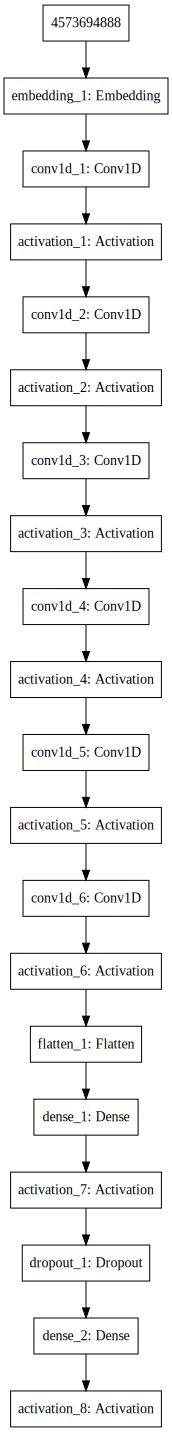

In [14]:
#inspect model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cnn).create(prog='dot', format='svg'))

In [15]:
predictions = cnn.predict(paddedseq)

In [16]:
#inspect predictions
diff=[]
for i in range(len(predictions)):
    diff.append(predictions[i]-paddedtext['labels'].tolist()[i])

for i in range(len(predictions)):
    print(str(i) + str(predictions[i]) +'  '+ str(paddedtext['labels'].tolist()[i]))

0[0.2788094]  0.31
1[0.6467227]  0.7
2[0.20012495]  0.26
3[0.31880754]  0.26
4[0.5189289]  0.69
5[0.07897415]  0.06
6[0.70015466]  0.69
7[0.27105147]  0.26
8[0.35403338]  0.26
9[0.71803653]  0.76
10[0.15651406]  0.31
11[0.7277694]  0.76
12[0.67475235]  0.76
13[0.72523606]  0.7
14[0.15137896]  0.26
15[0.25353932]  0.31
16[0.3434887]  0.26
17[0.27740085]  0.31
18[0.6567358]  0.76
19[0.17896554]  0.26
20[0.18404591]  0.06
21[0.24020702]  0.26
22[0.11391224]  0.06
23[0.20582208]  0.31
24[0.18040864]  0.26
25[0.23424934]  0.06
26[0.69738364]  0.7
27[0.703038]  0.76
28[0.7229812]  0.7
29[0.7166716]  0.7
30[0.11267243]  0.31
31[0.24760586]  0.31
32[0.19484581]  0.31
33[0.74553335]  0.69
34[0.4841856]  0.7
35[0.64368784]  0.7
36[0.3216275]  0.31
37[0.13392699]  0.31
38[0.32066017]  0.31
39[0.19749731]  0.26
40[0.7007772]  0.7
41[0.7480072]  0.82
42[0.6880567]  0.76
43[0.6928338]  0.76
44[0.6848105]  0.76
45[0.75412655]  0.76
46[0.66185606]  0.69
47[0.650023]  0.7
48[0.65261817]  0.82
49[0.6952

447[0.22765186]  0.26
448[0.15824047]  0.06
449[0.6886059]  0.76
450[0.64386344]  0.76
451[0.2985229]  0.76
452[0.15033793]  0.26
453[0.22357026]  0.82
454[0.73789823]  0.7
455[0.20837855]  0.76
456[0.30883175]  0.26
457[0.7442608]  0.76
458[0.69850326]  0.76
459[0.32507104]  0.31
460[0.6493132]  0.69
461[0.61111045]  0.7
462[0.69645774]  0.82
463[0.44271573]  0.82
464[0.15315959]  0.76
465[0.19525328]  0.26
466[0.7797651]  0.69
467[0.08192161]  0.06
468[0.52356386]  0.76
469[0.10598545]  0.26
470[0.3979179]  0.06
471[0.21929437]  0.31
472[0.6510899]  0.69
473[0.12713835]  0.31
474[0.13473351]  0.06
475[0.10575367]  0.26
476[0.62120545]  0.82
477[0.34834805]  0.31
478[0.6408987]  0.69
479[0.07934393]  0.06
480[0.18703075]  0.31
481[0.04682153]  0.06
482[0.6807753]  0.7
483[0.09189607]  0.06
484[0.6678375]  0.76
485[0.7280507]  0.7
486[0.7027428]  0.76
487[0.6312437]  0.7
488[0.7100074]  0.69
489[0.12333275]  0.06
490[0.43539247]  0.69
491[0.23375908]  0.31
492[0.7335783]  0.76
493[0.74

1081[0.30577892]  0.31
1082[0.23045254]  0.26
1083[0.53350496]  0.76
1084[0.30380258]  0.31
1085[0.7080358]  0.76
1086[0.71173215]  0.7
1087[0.16760759]  0.06
1088[0.21862447]  0.06
1089[0.37001634]  0.69
1090[0.10803214]  0.31
1091[0.26079136]  0.26
1092[0.17790101]  0.31
1093[0.26403156]  0.26
1094[0.6706723]  0.7
1095[0.6701306]  0.76
1096[0.6901698]  0.7
1097[0.6669582]  0.7
1098[0.632661]  0.69
1099[0.5941122]  0.7
1100[0.15481563]  0.31
1101[0.74954414]  0.76
1102[0.7192297]  0.7
1103[0.14902769]  0.06
1104[0.7131953]  0.69
1105[0.6970546]  0.69
1106[0.5006138]  0.76
1107[0.24395297]  0.06
1108[0.3347767]  0.31
1109[0.6142019]  0.26
1110[0.62030137]  0.7
1111[0.22735733]  0.31
1112[0.07186887]  0.26
1113[0.74993694]  0.7
1114[0.7239703]  0.69
1115[0.7627678]  0.76
1116[0.25845912]  0.7
1117[0.7284707]  0.69
1118[0.6732837]  0.76
1119[0.6246563]  0.76
1120[0.1630469]  0.06
1121[0.7498814]  0.76
1122[0.17203909]  0.26
1123[0.11099096]  0.06
1124[0.48104241]  0.31
1125[0.71073616]  

1530[0.31372643]  0.31
1531[0.20142616]  0.31
1532[0.21175526]  0.06
1533[0.6754923]  0.82
1534[0.7388854]  0.69
1535[0.12576513]  0.06
1536[0.14436816]  0.06
1537[0.1088957]  0.06
1538[0.17491084]  0.26
1539[0.62374234]  0.76
1540[0.66424]  0.7
1541[0.712556]  0.7
1542[0.5588096]  0.7
1543[0.22403309]  0.26
1544[0.43363473]  0.7
1545[0.67145956]  0.76
1546[0.19664507]  0.26
1547[0.26866266]  0.31
1548[0.6750207]  0.76
1549[0.6451707]  0.69
1550[0.3136309]  0.31
1551[0.69494414]  0.82
1552[0.27873755]  0.26
1553[0.16290998]  0.06
1554[0.608233]  0.82
1555[0.6618537]  0.7
1556[0.74890137]  0.7
1557[0.70702434]  0.7
1558[0.57414687]  0.7
1559[0.14664921]  0.31
1560[0.31520373]  0.26
1561[0.49950945]  0.76
1562[0.6705451]  0.7
1563[0.25695425]  0.31
1564[0.13780126]  0.06
1565[0.704579]  0.69
1566[0.64675915]  0.82
1567[0.35656473]  0.26
1568[0.7633939]  0.76
1569[0.7291955]  0.82
1570[0.6654111]  0.76
1571[0.6494745]  0.76
1572[0.32906777]  0.31
1573[0.69734836]  0.7
1574[0.65077496]  0.

1956[0.61623645]  0.7
1957[0.0993613]  0.26
1958[0.10264257]  0.06
1959[0.5972936]  0.76
1960[0.4510728]  0.26
1961[0.6913904]  0.82
1962[0.7121737]  0.82
1963[0.4279614]  0.7
1964[0.20957366]  0.31
1965[0.71471655]  0.69
1966[0.05691253]  0.06
1967[0.25158882]  0.69
1968[0.5828725]  0.82
1969[0.15619074]  0.06
1970[0.6413541]  0.7
1971[0.24091408]  0.26
1972[0.22718516]  0.31
1973[0.2496098]  0.76
1974[0.10942542]  0.06
1975[0.72144437]  0.82
1976[0.19141763]  0.06
1977[0.68423367]  0.69
1978[0.14123318]  0.26
1979[0.19372536]  0.26
1980[0.33951205]  0.26
1981[0.66475046]  0.7
1982[0.18263748]  0.26
1983[0.08187978]  0.06
1984[0.6869278]  0.7
1985[0.72994554]  0.7
1986[0.1474612]  0.26
1987[0.13318774]  0.26
1988[0.67238355]  0.7
1989[0.18412124]  0.26
1990[0.30919123]  0.7
1991[0.101828]  0.06
1992[0.17235376]  0.31
1993[0.14574581]  0.06
1994[0.3900427]  0.06
1995[0.10317644]  0.06
1996[0.6933831]  0.7
1997[0.66140366]  0.76
1998[0.12241321]  0.31
1999[0.70722055]  0.69
2000[0.66997

2336[0.21656796]  0.31
2337[0.19612259]  0.31
2338[0.69667196]  0.7
2339[0.19493322]  0.26
2340[0.6922567]  0.7
2341[0.69320965]  0.69
2342[0.7637323]  0.7
2343[0.21328743]  0.06
2344[0.13682511]  0.31
2345[0.23734473]  0.26
2346[0.6467414]  0.76
2347[0.22453274]  0.26
2348[0.7157315]  0.82
2349[0.16964933]  0.06
2350[0.73080707]  0.7
2351[0.3952835]  0.31
2352[0.70479155]  0.7
2353[0.2919131]  0.31
2354[0.7313216]  0.76
2355[0.2631768]  0.26
2356[0.59054255]  0.82
2357[0.18482728]  0.26
2358[0.70134175]  0.82
2359[0.19776765]  0.26
2360[0.31669962]  0.31
2361[0.4863557]  0.31
2362[0.649997]  0.7
2363[0.26737636]  0.26
2364[0.68063056]  0.69
2365[0.16023839]  0.31
2366[0.6865889]  0.7
2367[0.70892704]  0.7
2368[0.6097926]  0.82
2369[0.29413885]  0.31
2370[0.14213333]  0.26
2371[0.7050719]  0.76
2372[0.70991635]  0.7
2373[0.7369126]  0.76
2374[0.15661867]  0.26
2375[0.37481722]  0.76
2376[0.6435338]  0.31
2377[0.29559764]  0.26
2378[0.6818085]  0.76
2379[0.70582724]  0.7
2380[0.652763] 

3028[0.35719642]  0.76
3029[0.19000128]  0.26
3030[0.59823287]  0.76
3031[0.6598618]  0.69
3032[0.20241396]  0.31
3033[0.21051237]  0.31
3034[0.727841]  0.76
3035[0.7358761]  0.76
3036[0.6644776]  0.7
3037[0.68154323]  0.69
3038[0.69137824]  0.69
3039[0.57680523]  0.76
3040[0.6718724]  0.7
3041[0.6511694]  0.69
3042[0.2520042]  0.06
3043[0.71583664]  0.76
3044[0.11828353]  0.06
3045[0.7454401]  0.7
3046[0.1134166]  0.06
3047[0.12778476]  0.06
3048[0.14132653]  0.06
3049[0.17761818]  0.26
3050[0.16545713]  0.26
3051[0.18639845]  0.26
3052[0.19859886]  0.31
3053[0.63891506]  0.69
3054[0.7283888]  0.76
3055[0.21736106]  0.26
3056[0.7533243]  0.76
3057[0.70704293]  0.76
3058[0.62907386]  0.7
3059[0.14632604]  0.26
3060[0.7553544]  0.76
3061[0.6332631]  0.82
3062[0.61589754]  0.7
3063[0.20844598]  0.26
3064[0.19744343]  0.26
3065[0.19592564]  0.26
3066[0.6467135]  0.7
3067[0.6612388]  0.76
3068[0.1857624]  0.26
3069[0.6262573]  0.82
3070[0.20993714]  0.26
3071[0.32496214]  0.31
3072[0.16617

3421[0.1652517]  0.26
3422[0.7167877]  0.7
3423[0.09129911]  0.06
3424[0.78182304]  0.76
3425[0.22917482]  0.26
3426[0.69085157]  0.7
3427[0.6371728]  0.82
3428[0.20693657]  0.26
3429[0.09117642]  0.06
3430[0.51344466]  0.7
3431[0.13466796]  0.26
3432[0.14942789]  0.06
3433[0.6468022]  0.76
3434[0.20032981]  0.06
3435[0.1766918]  0.06
3436[0.2443634]  0.7
3437[0.69146895]  0.7
3438[0.26284432]  0.31
3439[0.19905683]  0.26
3440[0.694788]  0.76
3441[0.63110065]  0.7
3442[0.12992926]  0.06
3443[0.34287474]  0.31
3444[0.18947549]  0.26
3445[0.66597223]  0.7
3446[0.20653898]  0.26
3447[0.2474674]  0.31
3448[0.6674477]  0.7
3449[0.25903192]  0.31
3450[0.6499702]  0.7
3451[0.5921599]  0.7
3452[0.3069654]  0.26
3453[0.17533049]  0.26
3454[0.73574495]  0.69
3455[0.6420796]  0.76
3456[0.26242572]  0.31
3457[0.70250285]  0.69
3458[0.16660053]  0.31
3459[0.23315337]  0.31
3460[0.60905874]  0.26
3461[0.7390516]  0.76
3462[0.57461447]  0.76
3463[0.74167776]  0.69
3464[0.2632103]  0.31
3465[0.669732]

4185[0.17436907]  0.06
4186[0.6850091]  0.7
4187[0.11428297]  0.31
4188[0.3070918]  0.26
4189[0.7151998]  0.76
4190[0.08953989]  0.06
4191[0.68839157]  0.76
4192[0.6487695]  0.7
4193[0.15236856]  0.06
4194[0.15651762]  0.06
4195[0.09777165]  0.06
4196[0.706267]  0.69
4197[0.6392493]  0.76
4198[0.18735318]  0.31
4199[0.72039235]  0.69
4200[0.61469996]  0.69
4201[0.71246564]  0.69
4202[0.69327796]  0.69
4203[0.34285185]  0.06
4204[0.6359222]  0.7
4205[0.1878949]  0.31
4206[0.2028464]  0.06
4207[0.7157942]  0.7
4208[0.66447604]  0.76
4209[0.19177291]  0.31
4210[0.07002791]  0.06
4211[0.18020791]  0.26
4212[0.16964376]  0.31
4213[0.6921774]  0.69
4214[0.68847096]  0.69
4215[0.20740291]  0.82
4216[0.28005034]  0.31
4217[0.23232362]  0.31
4218[0.6877923]  0.7
4219[0.61414135]  0.7
4220[0.69255686]  0.69
4221[0.1614837]  0.26
4222[0.74654937]  0.76
4223[0.0825787]  0.06
4224[0.6385337]  0.76
4225[0.16839924]  0.31
4226[0.2523033]  0.26
4227[0.7354078]  0.76
4228[0.23395407]  0.06
4229[0.68458

5025[0.6989788]  0.7
5026[0.7235391]  0.76
5027[0.29877096]  0.26
5028[0.32356346]  0.31
5029[0.6693189]  0.82
5030[0.12488639]  0.26
5031[0.70786715]  0.7
5032[0.05321344]  0.06
5033[0.7388946]  0.76
5034[0.28137824]  0.31
5035[0.6593195]  0.7
5036[0.7048116]  0.7
5037[0.19538334]  0.31
5038[0.57034457]  0.7
5039[0.10841671]  0.26
5040[0.12070788]  0.06
5041[0.2824651]  0.31
5042[0.73411]  0.76
5043[0.6644145]  0.7
5044[0.20579647]  0.26
5045[0.73642933]  0.69
5046[0.4851003]  0.7
5047[0.6897756]  0.31
5048[0.6897222]  0.69
5049[0.20790905]  0.31
5050[0.29923755]  0.31
5051[0.7037883]  0.7
5052[0.22971001]  0.31
5053[0.1793481]  0.26
5054[0.13373835]  0.06
5055[0.7060026]  0.7
5056[0.05425765]  0.06
5057[0.5534128]  0.69
5058[0.14784631]  0.31
5059[0.6028347]  0.76
5060[0.30165535]  0.7
5061[0.20490764]  0.26
5062[0.75501156]  0.76
5063[0.13818659]  0.06
5064[0.7140597]  0.76
5065[0.73912895]  0.76
5066[0.745872]  0.76
5067[0.24286456]  0.31
5068[0.70741475]  0.76
5069[0.24011087]  0.

5492[0.22230852]  0.26
5493[0.61273134]  0.7
5494[0.6572846]  0.7
5495[0.2111765]  0.31
5496[0.28360838]  0.31
5497[0.41810125]  0.76
5498[0.6022862]  0.76
5499[0.19661513]  0.06
5500[0.33091357]  0.31
5501[0.10595456]  0.06
5502[0.6806836]  0.7
5503[0.21302536]  0.26
5504[0.2789536]  0.31
5505[0.64375234]  0.82
5506[0.24970505]  0.31
5507[0.10554381]  0.06
5508[0.10073099]  0.06
5509[0.22692308]  0.31
5510[0.38137636]  0.31
5511[0.69454896]  0.7
5512[0.14744501]  0.31
5513[0.27889892]  0.82
5514[0.7063086]  0.69
5515[0.76993465]  0.76
5516[0.6910006]  0.69
5517[0.64740336]  0.76
5518[0.27105674]  0.31
5519[0.11885382]  0.26
5520[0.18350056]  0.26
5521[0.6611588]  0.69
5522[0.6083578]  0.7
5523[0.70217]  0.76
5524[0.723346]  0.69
5525[0.08968277]  0.06
5526[0.18886979]  0.26
5527[0.64576185]  0.82
5528[0.47958127]  0.76
5529[0.67388415]  0.7
5530[0.645327]  0.69
5531[0.67646265]  0.7
5532[0.25986835]  0.31
5533[0.41759]  0.31
5534[0.13069794]  0.31
5535[0.6482029]  0.76
5536[0.14070734

6275[0.21500495]  0.06
6276[0.7130399]  0.76
6277[0.7444774]  0.76
6278[0.6877395]  0.7
6279[0.461574]  0.76
6280[0.63345456]  0.7
6281[0.5724299]  0.76
6282[0.39688355]  0.31
6283[0.2522575]  0.76
6284[0.09695435]  0.06
6285[0.1746677]  0.26
6286[0.5182959]  0.69
6287[0.17153272]  0.06
6288[0.6526942]  0.76
6289[0.6048275]  0.76
6290[0.21931672]  0.06
6291[0.7246356]  0.69
6292[0.53202325]  0.69
6293[0.64738977]  0.7
6294[0.321655]  0.06
6295[0.640483]  0.69
6296[0.6605569]  0.7
6297[0.22190022]  0.26
6298[0.47875014]  0.7
6299[0.68479455]  0.7
6300[0.14495613]  0.31
6301[0.3838499]  0.7
6302[0.09228151]  0.26
6303[0.66415644]  0.76
6304[0.12820995]  0.06
6305[0.22686568]  0.31
6306[0.49970797]  0.06
6307[0.24482498]  0.31
6308[0.1197897]  0.06
6309[0.6746136]  0.69
6310[0.7385751]  0.76
6311[0.1788483]  0.26
6312[0.43960395]  0.7
6313[0.71694887]  0.69
6314[0.6600299]  0.76
6315[0.69840956]  0.7
6316[0.7175882]  0.69
6317[0.57470876]  0.69
6318[0.3818839]  0.06
6319[0.17635497]  0.06

6681[0.7191248]  0.76
6682[0.16449176]  0.06
6683[0.65094864]  0.7
6684[0.13264214]  0.26
6685[0.658767]  0.7
6686[0.6091]  0.7
6687[0.20256588]  0.26
6688[0.7298882]  0.7
6689[0.12243676]  0.06
6690[0.47030476]  0.76
6691[0.69326496]  0.76
6692[0.71480036]  0.76
6693[0.70719695]  0.76
6694[0.66219354]  0.69
6695[0.60918486]  0.31
6696[0.6756995]  0.76
6697[0.5495863]  0.69
6698[0.5395262]  0.76
6699[0.59686196]  0.69
6700[0.74137425]  0.76
6701[0.14300069]  0.26
6702[0.61448383]  0.69
6703[0.15198341]  0.06
6704[0.19628792]  0.26
6705[0.6772865]  0.82
6706[0.7363037]  0.82
6707[0.14541306]  0.31
6708[0.09372003]  0.06
6709[0.6524445]  0.26
6710[0.5225588]  0.82
6711[0.2616495]  0.31
6712[0.25619975]  0.06
6713[0.21879871]  0.26
6714[0.29999378]  0.31
6715[0.20778367]  0.26
6716[0.50501156]  0.82
6717[0.1990826]  0.31
6718[0.31976718]  0.26
6719[0.29006788]  0.31
6720[0.7222414]  0.76
6721[0.6079767]  0.7
6722[0.70878065]  0.7
6723[0.438398]  0.82
6724[0.38006008]  0.06
6725[0.5058377]

7149[0.6610018]  0.7
7150[0.6067802]  0.7
7151[0.17278129]  0.26
7152[0.70009434]  0.69
7153[0.04022926]  0.06
7154[0.34474882]  0.31
7155[0.13396852]  0.06
7156[0.19176434]  0.31
7157[0.24232663]  0.26
7158[0.2786581]  0.31
7159[0.22695076]  0.06
7160[0.557209]  0.76
7161[0.6783854]  0.7
7162[0.66944563]  0.76
7163[0.0993964]  0.26
7164[0.19544202]  0.06
7165[0.1837745]  0.26
7166[0.70241725]  0.82
7167[0.6417906]  0.76
7168[0.15319091]  0.26
7169[0.6836431]  0.69
7170[0.74282956]  0.76
7171[0.07178822]  0.06
7172[0.69424486]  0.76
7173[0.54339254]  0.76
7174[0.6709242]  0.76
7175[0.15698105]  0.06
7176[0.7308686]  0.82
7177[0.38870844]  0.31
7178[0.16337685]  0.06
7179[0.7346504]  0.7
7180[0.7363535]  0.76
7181[0.5952039]  0.31
7182[0.7084043]  0.76
7183[0.71718156]  0.76
7184[0.16614358]  0.31
7185[0.]  0.06
7186[0.12675908]  0.06
7187[0.606302]  0.7
7188[0.6544918]  0.76
7189[0.7175542]  0.7
7190[0.27889055]  0.31
7191[0.641531]  0.82
7192[0.02449389]  0.06
7193[0.14244404]  0.31
7

7522[0.26775467]  0.26
7523[0.11453915]  0.06
7524[0.61008716]  0.7
7525[0.1203838]  0.31
7526[0.5840392]  0.76
7527[0.47290918]  0.7
7528[0.67602026]  0.76
7529[0.14115898]  0.31
7530[0.16713911]  0.06
7531[0.7381543]  0.69
7532[0.6747221]  0.76
7533[0.21665359]  0.26
7534[0.68935513]  0.76
7535[0.6703676]  0.7
7536[0.283517]  0.26
7537[0.41616276]  0.26
7538[0.17975228]  0.26
7539[0.13038343]  0.26
7540[0.46670398]  0.76
7541[0.08933125]  0.06
7542[0.34193206]  0.06
7543[0.22499141]  0.26
7544[0.549669]  0.76
7545[0.19891004]  0.31
7546[0.11476195]  0.31
7547[0.6784867]  0.82
7548[0.16156971]  0.31
7549[0.6642597]  0.76
7550[0.75401044]  0.76
7551[0.09796058]  0.06
7552[0.7176999]  0.7
7553[0.14395711]  0.31
7554[0.5475464]  0.82
7555[0.22939834]  0.26
7556[0.49610922]  0.82
7557[0.29133067]  0.31
7558[0.10241489]  0.06
7559[0.20948173]  0.31
7560[0.7380885]  0.76
7561[0.21622425]  0.31
7562[0.6348766]  0.7
7563[0.64366114]  0.69
7564[0.6341853]  0.76
7565[0.64675295]  0.7
7566[0.742

7972[0.65999794]  0.7
7973[0.22129679]  0.31
7974[0.70980644]  0.76
7975[0.7608812]  0.76
7976[0.11679932]  0.06
7977[0.14268212]  0.06
7978[0.66315544]  0.76
7979[0.33089656]  0.31
7980[0.64851534]  0.7
7981[0.22508056]  0.26
7982[0.703069]  0.76
7983[0.71435535]  0.69
7984[0.2633942]  0.31
7985[0.25315163]  0.26
7986[0.16899908]  0.76
7987[0.15026054]  0.06
7988[0.729964]  0.76
7989[0.7288561]  0.69
7990[0.64561343]  0.7
7991[0.7171942]  0.76
7992[0.26304948]  0.26
7993[0.7929046]  0.76
7994[0.19086659]  0.31
7995[0.69580555]  0.76
7996[0.14098895]  0.26
7997[0.17279859]  0.06
7998[0.6659082]  0.76
7999[0.3007691]  0.26
8000[0.1526427]  0.06
8001[0.59350574]  0.76
8002[0.71008086]  0.69
8003[0.6842067]  0.7
8004[0.3313425]  0.31
8005[0.574383]  0.7
8006[0.12427679]  0.06
8007[0.72158337]  0.76
8008[0.13667792]  0.06
8009[0.7569045]  0.7
8010[0.2041671]  0.26
8011[0.11138953]  0.06
8012[0.08528198]  0.06
8013[0.24125403]  0.31
8014[0.18827489]  0.26
8015[0.7271793]  0.76
8016[0.241338

8400[0.23406279]  0.26
8401[0.18824]  0.31
8402[0.71949196]  0.82
8403[0.33226597]  0.06
8404[0.15742981]  0.26
8405[0.65218294]  0.76
8406[0.2119387]  0.26
8407[0.19076346]  0.26
8408[0.310309]  0.26
8409[0.6415558]  0.76
8410[0.16364703]  0.31
8411[0.6869863]  0.69
8412[0.17948619]  0.06
8413[0.6328763]  0.69
8414[0.39452004]  0.31
8415[0.15545262]  0.26
8416[0.7118161]  0.76
8417[0.20377132]  0.26
8418[0.21686584]  0.31
8419[0.13376993]  0.06
8420[0.64671814]  0.69
8421[0.21500856]  0.31
8422[0.1216746]  0.06
8423[0.21413511]  0.7
8424[0.7230997]  0.7
8425[0.6671034]  0.76
8426[0.7016089]  0.76
8427[0.70673835]  0.76
8428[0.16861184]  0.31
8429[0.22615436]  0.31
8430[0.6784408]  0.69
8431[0.70384014]  0.69
8432[0.6234945]  0.69
8433[0.27587014]  0.31
8434[0.1568611]  0.31
8435[0.69114697]  0.82
8436[0.06702044]  0.06
8437[0.07955275]  0.06
8438[0.69775224]  0.76
8439[0.6369724]  0.82
8440[0.11894354]  0.31
8441[0.12195872]  0.06
8442[0.34216213]  0.31
8443[0.22943428]  0.31
8444[0.6

8831[0.2748141]  0.26
8832[0.2441825]  0.31
8833[0.09838112]  0.06
8834[0.55982876]  0.69
8835[0.6771985]  0.82
8836[0.14589286]  0.26
8837[0.19617352]  0.26
8838[0.6871697]  0.76
8839[0.25930247]  0.26
8840[0.69769]  0.7
8841[0.24946958]  0.26
8842[0.23974928]  0.31
8843[0.09418424]  0.06
8844[0.24513894]  0.31
8845[0.14529213]  0.26
8846[0.3036481]  0.26
8847[0.6135211]  0.76
8848[0.7104604]  0.82
8849[0.30953017]  0.26
8850[0.6688223]  0.7
8851[0.7426543]  0.76
8852[0.6516254]  0.7
8853[0.6770431]  0.69
8854[0.72760797]  0.76
8855[0.13951789]  0.06
8856[0.571931]  0.7
8857[0.27269673]  0.31
8858[0.21026371]  0.26
8859[0.11206698]  0.06
8860[0.32060915]  0.31
8861[0.693416]  0.7
8862[0.18290502]  0.31
8863[0.51155555]  0.7
8864[0.06923904]  0.06
8865[0.23325199]  0.31
8866[0.6574781]  0.76
8867[0.7093102]  0.76
8868[0.6348487]  0.69
8869[0.7222667]  0.69
8870[0.1829175]  0.06
8871[0.61308134]  0.76
8872[0.1757957]  0.31
8873[0.10317743]  0.06
8874[0.24428326]  0.31
8875[0.2849089]  0

9551[0.6502081]  0.69
9552[0.7062088]  0.69
9553[0.7053443]  0.7
9554[0.70771027]  0.82
9555[0.16264886]  0.06
9556[0.74587095]  0.76
9557[0.18636394]  0.31
9558[0.18404159]  0.26
9559[0.2829954]  0.26
9560[0.1496609]  0.06
9561[0.72194946]  0.7
9562[0.23158276]  0.31
9563[0.7002759]  0.82
9564[0.6908659]  0.7
9565[0.70077693]  0.7
9566[0.65392137]  0.76
9567[0.48305392]  0.31
9568[0.6297331]  0.69
9569[0.67332196]  0.69
9570[0.2528847]  0.31
9571[0.71011233]  0.82
9572[0.62831473]  0.69
9573[0.6802101]  0.7
9574[0.18159667]  0.26
9575[0.6889206]  0.69
9576[0.15509395]  0.26
9577[0.7013165]  0.69
9578[0.5948788]  0.7
9579[0.6635649]  0.76
9580[0.6749159]  0.76
9581[0.20664711]  0.31
9582[0.6318611]  0.69
9583[0.2004816]  0.06
9584[0.7199751]  0.76
9585[0.09171231]  0.26
9586[0.73858345]  0.82
9587[0.16335917]  0.26
9588[0.6405411]  0.69
9589[0.21736364]  0.31
9590[0.12202123]  0.31
9591[0.16622032]  0.31
9592[0.6934718]  0.69
9593[0.25232023]  0.26
9594[0.7333603]  0.76
9595[0.2287536]

10019[0.65602994]  0.06
10020[0.49153224]  0.69
10021[0.6301874]  0.76
10022[0.32285833]  0.76
10023[0.19452956]  0.26
10024[0.66500664]  0.7
10025[0.31334752]  0.26
10026[0.2241138]  0.06
10027[0.20454755]  0.31
10028[0.23112513]  0.26
10029[0.05817615]  0.06
10030[0.67262983]  0.7
10031[0.13464394]  0.26
10032[0.7210033]  0.76
10033[0.69125175]  0.69
10034[0.6697426]  0.82
10035[0.68363774]  0.69
10036[0.25438228]  0.31
10037[0.6354406]  0.7
10038[0.68338776]  0.7
10039[0.30879027]  0.31
10040[0.21661465]  0.31
10041[0.21921904]  0.26
10042[0.67405677]  0.69
10043[0.20022643]  0.06
10044[0.7320435]  0.76
10045[0.20217785]  0.26
10046[0.19935827]  0.26
10047[0.66464543]  0.7
10048[0.21138074]  0.31
10049[0.65676963]  0.76
10050[0.21467671]  0.31
10051[0.71726596]  0.7
10052[0.20966613]  0.31
10053[0.6818198]  0.7
10054[0.24113593]  0.06
10055[0.10401506]  0.06
10056[0.23415786]  0.31
10057[0.22225958]  0.31
10058[0.6998321]  0.76
10059[0.20744891]  0.31
10060[0.6897756]  0.69
10061[0.

10430[0.717167]  0.69
10431[0.72086835]  0.69
10432[0.63948333]  0.76
10433[0.6862689]  0.7
10434[0.7302499]  0.7
10435[0.6594758]  0.82
10436[0.1925486]  0.26
10437[0.12055382]  0.31
10438[0.7217716]  0.7
10439[0.19425763]  0.26
10440[0.6502993]  0.7
10441[0.44778827]  0.26
10442[0.26898828]  0.26
10443[0.27635562]  0.26
10444[0.73358023]  0.76
10445[0.27402368]  0.31
10446[0.18148792]  0.31
10447[0.170775]  0.31
10448[0.29832503]  0.26
10449[0.37236616]  0.26
10450[0.6656461]  0.7
10451[0.7534162]  0.76
10452[0.60492504]  0.82
10453[0.23394471]  0.31
10454[0.17413774]  0.06
10455[0.13022077]  0.31
10456[0.6303241]  0.7
10457[0.3107154]  0.31
10458[0.6731299]  0.7
10459[0.6586747]  0.7
10460[0.17675647]  0.31
10461[0.4516297]  0.7
10462[0.21552473]  0.26
10463[0.68593407]  0.69
10464[0.23217592]  0.26
10465[0.7392026]  0.76
10466[0.71097994]  0.82
10467[0.1562547]  0.26
10468[0.11192244]  0.06
10469[0.24749629]  0.76
10470[0.63066876]  0.76
10471[0.71100605]  0.7
10472[0.6975064]  0.7

11117[0.15676197]  0.26
11118[0.6152916]  0.7
11119[0.17988923]  0.26
11120[0.7269312]  0.76
11121[0.21104339]  0.31
11122[0.24748701]  0.26
11123[0.11769761]  0.06
11124[0.7191001]  0.69
11125[0.6715238]  0.7
11126[0.58600783]  0.69
11127[0.29828647]  0.31
11128[0.3380689]  0.76
11129[0.6986445]  0.76
11130[0.19737613]  0.26
11131[0.23034248]  0.31
11132[0.651391]  0.82
11133[0.36915997]  0.31
11134[0.19761524]  0.31
11135[0.08386868]  0.06
11136[0.28727332]  0.31
11137[0.21112475]  0.26
11138[0.66749036]  0.69
11139[0.6972376]  0.76
11140[0.6888027]  0.69
11141[0.6996727]  0.7
11142[0.6808076]  0.7
11143[0.6467538]  0.7
11144[0.20743105]  0.26
11145[0.559322]  0.69
11146[0.6443435]  0.69
11147[0.1340876]  0.06
11148[0.16830882]  0.06
11149[0.14437672]  0.06
11150[0.11773048]  0.06
11151[0.15738803]  0.06
11152[0.18089896]  0.26
11153[0.643752]  0.69
11154[0.14816697]  0.06
11155[0.7005099]  0.7
11156[0.67510617]  0.82
11157[0.61433494]  0.69
11158[0.709677]  0.69
11159[0.7133913]  0.

11517[0.08310271]  0.06
11518[0.09319811]  0.06
11519[0.7634386]  0.76
11520[0.20535581]  0.31
11521[0.25683975]  0.31
11522[0.1667525]  0.26
11523[0.17363688]  0.26
11524[0.18455154]  0.06
11525[0.62287474]  0.69
11526[0.6949668]  0.76
11527[0.60178363]  0.69
11528[0.11234398]  0.06
11529[0.2888922]  0.26
11530[0.72110915]  0.7
11531[0.74664354]  0.82
11532[0.26277623]  0.31
11533[0.6716455]  0.7
11534[0.1622836]  0.06
11535[0.73623395]  0.76
11536[0.08997768]  0.06
11537[0.11693355]  0.06
11538[0.65340424]  0.7
11539[0.22400731]  0.06
11540[0.6612687]  0.26
11541[0.56860554]  0.7
11542[0.69001293]  0.76
11543[0.7008375]  0.76
11544[0.69004583]  0.82
11545[0.20498432]  0.26
11546[0.14392413]  0.26
11547[0.30538133]  0.31
11548[0.24491483]  0.26
11549[0.7092874]  0.76
11550[0.12157513]  0.06
11551[0.673893]  0.69
11552[0.19150758]  0.31
11553[0.70018244]  0.69
11554[0.6491276]  0.7
11555[0.74023867]  0.7
11556[0.53754497]  0.76
11557[0.1036968]  0.06
11558[0.11599474]  0.26
11559[0.693

11922[0.19785616]  0.06
11923[0.62435067]  0.7
11924[0.7148479]  0.76
11925[0.6470907]  0.69
11926[0.60124063]  0.31
11927[0.6575204]  0.7
11928[0.27783334]  0.26
11929[0.7013624]  0.7
11930[0.22900736]  0.31
11931[0.16618408]  0.26
11932[0.16672358]  0.06
11933[0.16195436]  0.31
11934[0.24511607]  0.31
11935[0.18152553]  0.31
11936[0.12644324]  0.06
11937[0.6245408]  0.7
11938[0.5497612]  0.26
11939[0.22503877]  0.31
11940[0.64789987]  0.69
11941[0.24983248]  0.31
11942[0.06899318]  0.06
11943[0.5743631]  0.7
11944[0.662132]  0.7
11945[0.6950755]  0.69
11946[0.70338964]  0.7
11947[0.08503315]  0.06
11948[0.65171635]  0.69
11949[0.55840206]  0.76
11950[0.18652676]  0.31
11951[0.6560166]  0.76
11952[0.6692066]  0.7
11953[0.40765825]  0.7
11954[0.68614364]  0.7
11955[0.21456864]  0.31
11956[0.15550143]  0.26
11957[0.71800685]  0.76
11958[0.26863673]  0.06
11959[0.07442559]  0.06
11960[0.4888573]  0.76
11961[0.27002782]  0.31
11962[0.14924844]  0.26
11963[0.71566737]  0.7
11964[0.7064333]

12516[0.3683242]  0.31
12517[0.55193937]  0.31
12518[0.68391585]  0.7
12519[0.19907874]  0.31
12520[0.23491116]  0.31
12521[0.66666174]  0.7
12522[0.1046996]  0.26
12523[0.3083036]  0.26
12524[0.69499147]  0.7
12525[0.6709459]  0.76
12526[0.17160395]  0.31
12527[0.16740218]  0.26
12528[0.62386405]  0.31
12529[0.34658885]  0.76
12530[0.68023586]  0.69
12531[0.72549915]  0.69
12532[0.6593784]  0.76
12533[0.6925851]  0.82
12534[0.72382915]  0.69
12535[0.67232704]  0.76
12536[0.47904113]  0.69
12537[0.2559967]  0.31
12538[0.53203297]  0.82
12539[0.7192087]  0.7
12540[0.18689713]  0.06
12541[0.6644763]  0.69
12542[0.26398808]  0.82
12543[0.21180375]  0.31
12544[0.2103954]  0.31
12545[0.16972709]  0.31
12546[0.50238866]  0.76
12547[0.19058274]  0.31
12548[0.72523475]  0.76
12549[0.24020559]  0.26
12550[0.22030674]  0.31
12551[0.7167361]  0.69
12552[0.7165046]  0.82
12553[0.1806106]  0.26
12554[0.7101865]  0.7
12555[0.6826564]  0.7
12556[0.6597054]  0.7
12557[0.2402739]  0.26
12558[0.40465227

12890[0.676996]  0.7
12891[0.7131965]  0.82
12892[0.10318236]  0.26
12893[0.17703497]  0.06
12894[0.19943674]  0.06
12895[0.37992123]  0.76
12896[0.07748675]  0.06
12897[0.6410456]  0.7
12898[0.6275004]  0.82
12899[0.57566226]  0.7
12900[0.14172071]  0.26
12901[0.21592996]  0.31
12902[0.7150035]  0.69
12903[0.28101245]  0.31
12904[0.74070764]  0.7
12905[0.66170526]  0.82
12906[0.45473287]  0.26
12907[0.1148413]  0.31
12908[0.6396642]  0.69
12909[0.3105937]  0.31
12910[0.18884149]  0.26
12911[0.21050225]  0.26
12912[0.48889795]  0.31
12913[0.22700389]  0.31
12914[0.71805227]  0.7
12915[0.3129541]  0.06
12916[0.62502754]  0.76
12917[0.18783264]  0.26
12918[0.18707678]  0.31
12919[0.15721655]  0.31
12920[0.74700344]  0.76
12921[0.16219878]  0.31
12922[0.3843175]  0.7
12923[0.55358684]  0.82
12924[0.39879933]  0.31
12925[0.6992892]  0.82
12926[0.7237445]  0.76
12927[0.690104]  0.69
12928[0.34713268]  0.31
12929[0.66336346]  0.76
12930[0.15628384]  0.31
12931[0.6436676]  0.69
12932[0.268306

13290[0.14888452]  0.31
13291[0.377451]  0.31
13292[0.6814866]  0.7
13293[0.17123039]  0.06
13294[0.14283705]  0.31
13295[0.7199923]  0.82
13296[0.48235515]  0.76
13297[0.35668012]  0.31
13298[0.63830364]  0.82
13299[0.17523816]  0.26
13300[0.59306395]  0.7
13301[0.10370257]  0.31
13302[0.7120838]  0.69
13303[0.41837558]  0.7
13304[0.4566289]  0.26
13305[0.46139303]  0.31
13306[0.16494425]  0.31
13307[0.2506938]  0.31
13308[0.35904965]  0.31
13309[0.7192497]  0.69
13310[0.3219886]  0.76
13311[0.23204088]  0.31
13312[0.22032732]  0.26
13313[0.1282402]  0.06
13314[0.10963599]  0.31
13315[0.40179154]  0.69
13316[0.41929057]  0.7
13317[0.08754788]  0.06
13318[0.7555678]  0.76
13319[0.36165807]  0.69
13320[0.2904299]  0.7
13321[0.7215049]  0.7
13322[0.53007984]  0.82
13323[0.15181074]  0.76
13324[0.71095216]  0.76
13325[0.71337295]  0.76
13326[0.7069328]  0.76
13327[0.6828232]  0.69
13328[0.49742824]  0.7
13329[0.66070867]  0.76
13330[0.19121715]  0.06
13331[0.19147962]  0.26
13332[0.555330

13785[0.1607152]  0.31
13786[0.7176876]  0.69
13787[0.7065754]  0.7
13788[0.14043489]  0.06
13789[0.19856316]  0.76
13790[0.71699166]  0.7
13791[0.7230494]  0.7
13792[0.68978894]  0.7
13793[0.07823354]  0.06
13794[0.1460678]  0.26
13795[0.7252785]  0.7
13796[0.6619822]  0.7
13797[0.56198347]  0.31
13798[0.33719957]  0.31
13799[0.7075288]  0.7
13800[0.70960104]  0.76
13801[0.13604936]  0.31
13802[0.7187176]  0.76
13803[0.7016145]  0.7
13804[0.16217811]  0.26
13805[0.17540102]  0.31
13806[0.18067701]  0.31
13807[0.23236412]  0.26
13808[0.14380443]  0.06
13809[0.13572234]  0.06
13810[0.30907303]  0.31
13811[0.7069917]  0.7
13812[0.6733835]  0.26
13813[0.09763884]  0.06
13814[0.62781143]  0.7
13815[0.7419882]  0.69
13816[0.21312015]  0.26
13817[0.2881777]  0.69
13818[0.70562446]  0.31
13819[0.27786255]  0.76
13820[0.4703338]  0.76
13821[0.10201467]  0.26
13822[0.69319475]  0.7
13823[0.78028166]  0.7
13824[0.72118604]  0.69
13825[0.18580006]  0.31
13826[0.27483553]  0.26
13827[0.36869282]  

14259[0.10247165]  0.06
14260[0.6337757]  0.7
14261[0.7526629]  0.76
14262[0.7075459]  0.7
14263[0.7297019]  0.76
14264[0.74007237]  0.76
14265[0.10505785]  0.06
14266[0.17867392]  0.26
14267[0.7528086]  0.76
14268[0.69610596]  0.31
14269[0.6973405]  0.7
14270[0.17193946]  0.06
14271[0.13475826]  0.06
14272[0.7639061]  0.76
14273[0.124862]  0.06
14274[0.57116437]  0.06
14275[0.661011]  0.69
14276[0.5995512]  0.7
14277[0.7440002]  0.82
14278[0.67701864]  0.69
14279[0.14460588]  0.76
14280[0.0973211]  0.06
14281[0.18457118]  0.26
14282[0.7248305]  0.76
14283[0.15118022]  0.31
14284[0.42137352]  0.06
14285[0.50511765]  0.69
14286[0.6806421]  0.69
14287[0.1738021]  0.26
14288[0.12906697]  0.06
14289[0.159231]  0.06
14290[0.45183668]  0.31
14291[0.6650554]  0.76
14292[0.7360095]  0.76
14293[0.18398735]  0.31
14294[0.3528887]  0.26
14295[0.4441403]  0.26
14296[0.3807254]  0.69
14297[0.15211098]  0.31
14298[0.6122601]  0.76
14299[0.16990721]  0.06
14300[0.3518505]  0.06
14301[0.36650178]  0.7

14863[0.29239875]  0.31
14864[0.14723052]  0.31
14865[0.6826217]  0.82
14866[0.69263124]  0.69
14867[0.1899277]  0.06
14868[0.5457313]  0.26
14869[0.46782032]  0.7
14870[0.29287702]  0.31
14871[0.6679306]  0.76
14872[0.71794844]  0.69
14873[0.22314602]  0.31
14874[0.7704773]  0.76
14875[0.10090864]  0.82
14876[0.7491243]  0.76
14877[0.28877687]  0.31
14878[0.16443872]  0.7
14879[0.5569972]  0.7
14880[0.6222973]  0.31
14881[0.33249098]  0.06
14882[0.23033883]  0.31
14883[0.13613738]  0.06
14884[0.7072067]  0.76
14885[0.19981915]  0.31
14886[0.7146363]  0.69
14887[0.71275234]  0.69
14888[0.19489884]  0.76
14889[0.37722084]  0.76
14890[0.49574336]  0.7
14891[0.702459]  0.69
14892[0.5568738]  0.26
14893[0.21097505]  0.31
14894[0.6690434]  0.69
14895[0.68733346]  0.76
14896[0.12093572]  0.26
14897[0.30855617]  0.76
14898[0.3333316]  0.7
14899[0.216603]  0.26
14900[0.7541629]  0.76
14901[0.0629634]  0.06
14902[0.56116086]  0.06
14903[0.610646]  0.7
14904[0.69134235]  0.7
14905[0.72659993]  0

15513[0.496557]  0.7
15514[0.6782825]  0.76
15515[0.5269437]  0.69
15516[0.5073174]  0.26
15517[0.7400477]  0.76
15518[0.16490932]  0.31
15519[0.3260381]  0.31
15520[0.18980615]  0.7
15521[0.20907556]  0.26
15522[0.13899225]  0.26
15523[0.43388665]  0.76
15524[0.14728785]  0.26
15525[0.627964]  0.69
15526[0.42346045]  0.7
15527[0.31066585]  0.76
15528[0.11912771]  0.06
15529[0.13980609]  0.06
15530[0.37934998]  0.26
15531[0.3178546]  0.31
15532[0.6652354]  0.82
15533[0.20476332]  0.7
15534[0.07879157]  0.06
15535[0.7128793]  0.7
15536[0.41410732]  0.26
15537[0.6341859]  0.76
15538[0.18483397]  0.69
15539[0.71366954]  0.7
15540[0.09581278]  0.06
15541[0.10556174]  0.26
15542[0.38839003]  0.26
15543[0.48129997]  0.7
15544[0.30238205]  0.31
15545[0.6129613]  0.7
15546[0.1731099]  0.31
15547[0.15998735]  0.06
15548[0.3457307]  0.06
15549[0.6930269]  0.7
15550[0.3938244]  0.7
15551[0.6739056]  0.69
15552[0.588475]  0.69
15553[0.4787438]  0.31
15554[0.6206384]  0.7
15555[0.3724003]  0.31
155

16013[0.40964696]  0.31
16014[0.6803571]  0.69
16015[0.21928456]  0.31
16016[0.6630367]  0.76
16017[0.39490393]  0.26
16018[0.29063994]  0.76
16019[0.61252105]  0.31
16020[0.63946784]  0.7
16021[0.09540266]  0.06
16022[0.32789797]  0.82
16023[0.13402888]  0.06
16024[0.3122649]  0.76
16025[0.6665145]  0.31
16026[0.2044884]  0.31
16027[0.1028175]  0.06
16028[0.11380345]  0.06
16029[0.72007203]  0.7
16030[0.65530634]  0.82
16031[0.27526888]  0.06
16032[0.47763988]  0.82
16033[0.19003117]  0.26
16034[0.13836795]  0.06
16035[0.25131863]  0.26
16036[0.698961]  0.7
16037[0.13746092]  0.06
16038[0.4161338]  0.31
16039[0.32444972]  0.26
16040[0.22920142]  0.31
16041[0.4761252]  0.06
16042[0.36802968]  0.7
16043[0.5563526]  0.31
16044[0.30696973]  0.31
16045[0.60506237]  0.82
16046[0.6842643]  0.7
16047[0.33593398]  0.69
16048[0.30062678]  0.82
16049[0.22411114]  0.31
16050[0.69410574]  0.69
16051[0.24426092]  0.76
16052[0.19914433]  0.26
16053[0.7105119]  0.69
16054[0.5460385]  0.31
16055[0.716

16482[0.5673381]  0.76
16483[0.664098]  0.7
16484[0.7179694]  0.69
16485[0.14265251]  0.06
16486[0.7059679]  0.7
16487[0.3276418]  0.26
16488[0.14676128]  0.26
16489[0.719962]  0.69
16490[0.7110901]  0.69
16491[0.65792406]  0.7
16492[0.14917621]  0.06
16493[0.25481433]  0.31
16494[0.47046337]  0.26
16495[0.18213831]  0.31
16496[0.27079344]  0.26
16497[0.29832187]  0.26
16498[0.6942949]  0.7
16499[0.5157434]  0.26
16500[0.6331332]  0.7
16501[0.14968929]  0.26
16502[0.6902534]  0.76
16503[0.6615901]  0.7
16504[0.2084264]  0.7
16505[0.74366415]  0.69
16506[0.31306493]  0.76
16507[0.6295202]  0.76
16508[0.69642615]  0.7
16509[0.27956992]  0.7
16510[0.7114209]  0.76
16511[0.11183237]  0.06
16512[0.17846142]  0.7
16513[0.2115649]  0.26
16514[0.14625895]  0.31
16515[0.38644168]  0.26
16516[0.22250852]  0.26
16517[0.73102915]  0.76
16518[0.1780444]  0.26
16519[0.2028921]  0.76
16520[0.24475393]  0.26
16521[0.09832614]  0.06
16522[0.699931]  0.7
16523[0.18608534]  0.31
16524[0.3325682]  0.06
16

16990[0.7492064]  0.7
16991[0.34354764]  0.31
16992[0.25282198]  0.26
16993[0.1171518]  0.26
16994[0.1876436]  0.06
16995[0.24777955]  0.26
16996[0.18457472]  0.31
16997[0.2518158]  0.26
16998[0.19087149]  0.06
16999[0.6927135]  0.76
17000[0.6939297]  0.7
17001[0.2620321]  0.31
17002[0.36603448]  0.31
17003[0.11400174]  0.06
17004[0.6841451]  0.76
17005[0.48931575]  0.26
17006[0.66815555]  0.7
17007[0.04829274]  0.06
17008[0.7267256]  0.76
17009[0.6973721]  0.7
17010[0.535639]  0.26
17011[0.6501448]  0.69
17012[0.23750061]  0.26
17013[0.41905114]  0.76
17014[0.25904876]  0.26
17015[0.6609701]  0.69
17016[0.71367836]  0.7
17017[0.49161056]  0.06
17018[0.12471154]  0.31
17019[0.30842078]  0.26
17020[0.7470343]  0.76
17021[0.14383507]  0.06
17022[0.68550193]  0.7
17023[0.45333347]  0.82
17024[0.32122558]  0.31
17025[0.7026516]  0.7
17026[0.13229983]  0.06
17027[0.08106197]  0.06
17028[0.1474348]  0.31
17029[0.11959009]  0.06
17030[0.61436546]  0.26
17031[0.6122594]  0.69
17032[0.13698703]

17401[0.25170797]  0.31
17402[0.27968317]  0.7
17403[0.6631278]  0.7
17404[0.72707665]  0.7
17405[0.64481366]  0.69
17406[0.6898916]  0.82
17407[0.12060087]  0.06
17408[0.46293405]  0.76
17409[0.13559178]  0.06
17410[0.1632039]  0.31
17411[0.7136787]  0.82
17412[0.29328233]  0.69
17413[0.5726652]  0.31
17414[0.13370566]  0.06
17415[0.71035457]  0.76
17416[0.37934622]  0.26
17417[0.12683785]  0.26
17418[0.16518569]  0.31
17419[0.28097385]  0.26
17420[0.29112303]  0.31
17421[0.22653721]  0.26
17422[0.48417768]  0.7
17423[0.31101888]  0.7
17424[0.30346617]  0.76
17425[0.23989181]  0.26
17426[0.6893009]  0.76
17427[0.10525624]  0.26
17428[0.3814973]  0.26
17429[0.09697912]  0.06
17430[0.63503575]  0.31
17431[0.11311951]  0.06
17432[0.68052924]  0.69
17433[0.29731542]  0.06
17434[0.13666923]  0.06
17435[0.6326612]  0.7
17436[0.60337377]  0.69
17437[0.5445405]  0.82
17438[0.2014851]  0.06
17439[0.56910145]  0.26
17440[0.43223256]  0.26
17441[0.4490296]  0.76
17442[0.7351692]  0.76
17443[0.71

17879[0.22178894]  0.31
17880[0.2019753]  0.31
17881[0.74157166]  0.76
17882[0.6706493]  0.7
17883[0.6862117]  0.76
17884[0.748142]  0.76
17885[0.23826885]  0.26
17886[0.64671516]  0.7
17887[0.6587602]  0.26
17888[0.13328196]  0.82
17889[0.33661014]  0.82
17890[0.34954342]  0.26
17891[0.36467767]  0.7
17892[0.34437943]  0.82
17893[0.56596255]  0.7
17894[0.7016022]  0.76
17895[0.5958775]  0.7
17896[0.2173375]  0.26
17897[0.30489382]  0.26
17898[0.23075572]  0.26
17899[0.2239241]  0.26
17900[0.7026341]  0.69
17901[0.49164703]  0.69
17902[0.37347767]  0.31
17903[0.14157496]  0.26
17904[0.73477197]  0.7
17905[0.6512017]  0.69
17906[0.12000129]  0.06
17907[0.16867891]  0.26
17908[0.6307162]  0.7
17909[0.6972276]  0.7
17910[0.14542562]  0.06
17911[0.7307712]  0.76
17912[0.27400783]  0.31
17913[0.7453742]  0.76
17914[0.57260835]  0.26
17915[0.5225884]  0.7
17916[0.68487585]  0.69
17917[0.0813446]  0.06
17918[0.70438063]  0.76
17919[0.29297528]  0.06
17920[0.30122823]  0.69
17921[0.53606224]  

18325[0.4938809]  0.7
18326[0.61033237]  0.26
18327[0.31290096]  0.06
18328[0.701637]  0.69
18329[0.5361885]  0.26
18330[0.7476014]  0.76
18331[0.15295608]  0.76
18332[0.43125823]  0.31
18333[0.33889776]  0.76
18334[0.4106672]  0.06
18335[0.6778619]  0.69
18336[0.7189535]  0.69
18337[0.70383847]  0.76
18338[0.32281226]  0.31
18339[0.2872248]  0.26
18340[0.2166025]  0.06
18341[0.28248215]  0.31
18342[0.09316656]  0.06
18343[0.2870749]  0.31
18344[0.59058094]  0.7
18345[0.59806436]  0.06
18346[0.18672484]  0.06
18347[0.29244435]  0.76
18348[0.07053857]  0.26
18349[0.3303295]  0.31
18350[0.64662147]  0.31
18351[0.11716869]  0.06
18352[0.69437075]  0.69
18353[0.71868527]  0.7
18354[0.24560238]  0.31
18355[0.19239877]  0.26
18356[0.04543436]  0.06
18357[0.14305219]  0.06
18358[0.7271172]  0.69
18359[0.24267182]  0.76
18360[0.6305231]  0.76
18361[0.63462305]  0.69
18362[0.6968827]  0.7
18363[0.3075897]  0.06
18364[0.6965939]  0.76
18365[0.64671516]  0.82
18366[0.1773205]  0.26
18367[0.270804

18784[0.6992024]  0.76
18785[0.67567503]  0.7
18786[0.69340336]  0.7
18787[0.60109675]  0.69
18788[0.38794047]  0.7
18789[0.29962248]  0.7
18790[0.6245867]  0.82
18791[0.1078314]  0.26
18792[0.33346704]  0.76
18793[0.22899425]  0.31
18794[0.72613955]  0.82
18795[0.1472953]  0.31
18796[0.55313194]  0.69
18797[0.6780764]  0.69
18798[0.28275448]  0.69
18799[0.66816664]  0.69
18800[0.60753953]  0.69
18801[0.23819004]  0.06
18802[0.6341394]  0.31
18803[0.12363465]  0.06
18804[0.2668673]  0.06
18805[0.7048522]  0.69
18806[0.1887324]  0.26
18807[0.7631111]  0.76
18808[0.69177973]  0.7
18809[0.30280915]  0.26
18810[0.16556224]  0.31
18811[0.71564114]  0.76
18812[0.36947304]  0.7
18813[0.08848907]  0.06
18814[0.2541915]  0.31
18815[0.30695885]  0.76
18816[0.26698533]  0.69
18817[0.17950624]  0.26
18818[0.66219664]  0.69
18819[0.695529]  0.76
18820[0.45257688]  0.69
18821[0.6086576]  0.06
18822[0.11333439]  0.06
18823[0.32126984]  0.31
18824[0.3554801]  0.82
18825[0.18439707]  0.31
18826[0.67450

In [17]:

wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-0.5>=0 and paddedtext['labels'].tolist()[i]-0.5>=0:
        pass
    elif predictions[i]-0.5<=0 and paddedtext['labels'].tolist()[i]-0.5<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))

13996[0.49724922]  0.69
13997[0.17967153]  0.82
14006[0.27527574]  0.69
14016[0.2218852]  0.69
14022[0.45589656]  0.69
14034[0.29944974]  0.7
14044[0.35614204]  0.7
14049[0.27732673]  0.82
14057[0.6369412]  0.31
14077[0.29672605]  0.7
14078[0.19889309]  0.76
14079[0.6285473]  0.31
14085[0.5442028]  0.06
14086[0.17871554]  0.76
14091[0.3116845]  0.69
14115[0.5750052]  0.06
14131[0.4924538]  0.76
14140[0.46631333]  0.82
14148[0.42992777]  0.76
14158[0.61425817]  0.31
14170[0.19025856]  0.7
14175[0.6060232]  0.31
14176[0.36586276]  0.82
14192[0.54502463]  0.26
14199[0.47815546]  0.76
14213[0.4535312]  0.76
14218[0.2262195]  0.76
14219[0.23648345]  0.7
14232[0.26201963]  0.76
14233[0.49415186]  0.69
14243[0.38965026]  0.7
14245[0.19786742]  0.7
14248[0.40214884]  0.76
14252[0.46834838]  0.76
14253[0.5001606]  0.26
14255[0.5859363]  0.31
14268[0.69610596]  0.31
14274[0.57116437]  0.06
14279[0.14460588]  0.76
14296[0.3807254]  0.69
14301[0.36650178]  0.76
14307[0.8065363]  0.06
14309[0.64596

16295[0.67176926]  0.26
16305[0.64065194]  0.31
16311[0.39964405]  0.76
16315[0.49755844]  0.76
16317[0.3178045]  0.7
16337[0.58849233]  0.31
16342[0.16520199]  0.7
16346[0.48941413]  0.7
16353[0.46119103]  0.82
16370[0.29304653]  0.82
16371[0.21801]  0.7
16373[0.3683029]  0.7
16375[0.38720298]  0.69
16382[0.33841923]  0.82
16385[0.382112]  0.7
16388[0.4156389]  0.76
16392[0.72118795]  0.31
16393[0.61551034]  0.31
16395[0.25247252]  0.69
16396[0.4804299]  0.76
16401[0.45031187]  0.7
16402[0.6958076]  0.26
16409[0.33322373]  0.7
16413[0.638921]  0.26
16417[0.6463028]  0.26
16426[0.24737905]  0.76
16433[0.35468292]  0.69
16435[0.32073048]  0.76
16436[0.24975976]  0.76
16440[0.46887472]  0.69
16442[0.3494687]  0.69
16459[0.23232557]  0.76
16462[0.6447772]  0.31
16463[0.2634777]  0.76
16499[0.5157434]  0.26
16504[0.2084264]  0.7
16506[0.31306493]  0.76
16509[0.27956992]  0.7
16512[0.17846142]  0.7
16519[0.2028921]  0.76
16529[0.18682446]  0.76
16531[0.33081633]  0.7
16551[0.32897907]  0.7


18345[0.59806436]  0.06
18347[0.29244435]  0.76
18350[0.64662147]  0.31
18359[0.24267182]  0.76
18371[0.5683763]  0.31
18375[0.62512267]  0.26
18376[0.58182037]  0.26
18386[0.6229775]  0.06
18391[0.4181856]  0.7
18402[0.639459]  0.31
18405[0.6715051]  0.06
18407[0.16591638]  0.7
18417[0.33040333]  0.69
18419[0.15903008]  0.82
18423[0.45132256]  0.69
18426[0.48625192]  0.7
18428[0.46832797]  0.7
18431[0.62883925]  0.26
18436[0.29880294]  0.7
18440[0.31765118]  0.7
18448[0.5100986]  0.31
18453[0.6046833]  0.31
18458[0.60273457]  0.31
18463[0.6086954]  0.31
18464[0.16727735]  0.76
18469[0.47305602]  0.76
18475[0.14819774]  0.76
18480[0.44164872]  0.76
18483[0.49032378]  0.7
18492[0.46459863]  0.76
18497[0.3798429]  0.76
18498[0.33335474]  0.7
18499[0.36882567]  0.76
18502[0.22455132]  0.7
18504[0.70214474]  0.31
18506[0.5359471]  0.26
18511[0.48430154]  0.7
18514[0.5516281]  0.31
18515[0.48313385]  0.76
18518[0.5650157]  0.31
18521[0.14169145]  0.82
18530[0.2513209]  0.82
18535[0.23261108

In [18]:
pd.DataFrame(diff).max()
wrong

903

## scaled conservatism to 0-100

In [19]:
def mult100(x):
    return x*100
paddedtext['labels']= paddedtext['labels'].apply(mult100)
paddedtext

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,labels
0,0,0,0,0,0,0,0,0,0,0,...,391,5371,13,17,2682,6,5,2853,14280,31.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14281,70.0
2,0,0,0,0,0,0,0,0,0,0,...,5,859,4773,9703,4774,2854,9704,2855,1801,26.0
3,0,0,0,0,0,0,0,0,0,0,...,1,1669,53,89,2856,233,860,9706,14284,26.0
4,0,0,0,0,0,0,0,0,0,0,...,91,3292,7,1,616,980,4,1802,14285,69.0
5,0,0,0,0,0,0,0,0,0,0,...,4775,2,2431,10,5,3041,14,149,14286,6.0
6,0,0,0,0,0,0,0,0,0,0,...,2,121,1,51,376,122,2,1376,14287,69.0
7,0,0,0,0,0,0,0,0,0,0,...,9709,9710,3585,454,4776,5372,5373,9711,14288,26.0
8,0,0,0,0,0,0,0,0,0,0,...,9712,138,14,1146,2,835,1726,14290,14291,26.0
9,0,0,0,0,0,0,0,0,0,0,...,836,115,47,214,1252,58,19,7543,14292,76.0


In [20]:

cnn1.compile(optimizer='rmsprop',
              loss='mse')

history = cnn1.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 24s 2ms/step - loss: 644.5897 - val_loss: 384.1066
Epoch 2/5
13296/13296 [==============================] - 23s 2ms/step - loss: 418.0972 - val_loss: 424.7914
Epoch 3/5
13296/13296 [==============================] - 23s 2ms/step - loss: 335.8365 - val_loss: 381.2689
Epoch 4/5
13296/13296 [==============================] - 23s 2ms/step - loss: 277.2041 - val_loss: 352.8631
Epoch 5/5
13296/13296 [==============================] - 25s 2ms/step - loss: 240.7996 - val_loss: 498.0978


In [21]:
predictions1 = cnn1.predict(paddedseq)
diff=[]
for i in range(len(predictions)):
    diff.append(predictions1[i]-paddedtext['labels'].tolist()[i])


In [22]:
for i in range(len(predictions)):
    print(str(i) + str(predictions1[i]) +'  '+ str(paddedtext['labels'].tolist()[i]))

0[28.295572]  31.0
1[55.632732]  70.0
2[21.420786]  26.0
3[28.972416]  26.0
4[37.47467]  69.0
5[6.725276]  6.0
6[58.45672]  69.0
7[23.966301]  26.0
8[21.766933]  26.0
9[59.986496]  76.0
10[22.099556]  31.0
11[58.656563]  76.0
12[64.87083]  76.0
13[55.65866]  70.0
14[21.567804]  26.0
15[22.092112]  31.0
16[28.891384]  26.0
17[20.83935]  31.0
18[57.327583]  76.0
19[16.757057]  26.0
20[5.1271534]  6.0
21[23.490004]  26.0
22[9.648999]  6.0
23[21.913815]  31.0
24[15.848657]  26.0
25[17.97749]  6.0
26[54.890285]  70.0
27[63.113342]  76.0
28[59.428078]  70.0
29[47.560257]  70.0
30[6.9375086]  31.0
31[21.006601]  31.0
32[23.04441]  31.0
33[58.703278]  69.0
34[54.16955]  70.0
35[55.06849]  70.0
36[21.848354]  31.0
37[5.5323515]  31.0
38[25.540173]  31.0
39[21.163994]  26.0
40[49.983704]  70.0
41[68.212296]  82.0
42[59.74321]  76.0
43[47.83258]  76.0
44[64.83042]  76.0
45[58.47763]  76.0
46[48.505608]  69.0
47[53.408157]  70.0
48[61.65282]  82.0
49[51.352142]  82.0
50[20.609837]  26.0
51[37.7734

545[8.796065]  6.0
546[55.43605]  82.0
547[18.726715]  26.0
548[56.635624]  70.0
549[17.292355]  31.0
550[50.363976]  69.0
551[56.40005]  76.0
552[53.73228]  69.0
553[24.716404]  26.0
554[4.4448004]  6.0
555[4.993818]  6.0
556[3.128888]  6.0
557[45.51097]  70.0
558[24.23632]  31.0
559[53.670444]  69.0
560[18.929262]  26.0
561[10.244994]  6.0
562[9.360341]  6.0
563[37.380592]  31.0
564[65.5551]  76.0
565[54.86615]  70.0
566[16.106766]  6.0
567[3.3502684]  6.0
568[4.5287557]  6.0
569[32.84843]  31.0
570[55.223537]  82.0
571[61.083294]  76.0
572[52.38335]  70.0
573[3.3811955]  6.0
574[49.32808]  69.0
575[52.645847]  69.0
576[54.545223]  70.0
577[24.368795]  31.0
578[53.400528]  76.0
579[17.682394]  26.0
580[57.94571]  70.0
581[19.735565]  31.0
582[56.28863]  70.0
583[3.9770634]  26.0
584[57.321064]  82.0
585[12.0453005]  26.0
586[45.52929]  82.0
587[57.817673]  82.0
588[7.539695]  6.0
589[16.88911]  6.0
590[51.397034]  69.0
591[22.84098]  26.0
592[51.442726]  70.0
593[2.7866187]  6.0
594[

1032[23.539246]  26.0
1033[17.062092]  26.0
1034[22.87337]  26.0
1035[8.908652]  6.0
1036[7.7905955]  6.0
1037[20.57083]  26.0
1038[3.589563]  6.0
1039[14.621568]  26.0
1040[24.60799]  26.0
1041[49.212612]  76.0
1042[18.320095]  31.0
1043[54.54976]  82.0
1044[47.068634]  70.0
1045[3.1958337]  6.0
1046[54.457855]  76.0
1047[22.27301]  31.0
1048[10.652091]  31.0
1049[54.08068]  70.0
1050[57.16001]  69.0
1051[60.125214]  82.0
1052[60.836662]  82.0
1053[9.771671]  31.0
1054[52.0738]  82.0
1055[56.48729]  69.0
1056[55.102837]  70.0
1057[66.89328]  82.0
1058[22.69703]  26.0
1059[26.976294]  26.0
1060[3.2728858]  6.0
1061[57.09725]  70.0
1062[20.781357]  31.0
1063[9.936454]  31.0
1064[54.80435]  76.0
1065[59.02447]  76.0
1066[2.5622005]  6.0
1067[17.548801]  26.0
1068[22.949577]  26.0
1069[3.1123552]  6.0
1070[51.23994]  70.0
1071[9.311941]  6.0
1072[45.6548]  76.0
1073[51.35493]  76.0
1074[13.58612]  26.0
1075[16.52906]  26.0
1076[18.580444]  31.0
1077[58.268852]  76.0
1078[6.0734234]  31.0


1449[53.729126]  70.0
1450[12.863877]  26.0
1451[54.59719]  70.0
1452[24.883884]  31.0
1453[25.955502]  31.0
1454[50.523766]  69.0
1455[16.091799]  26.0
1456[16.699715]  6.0
1457[17.972347]  26.0
1458[26.49016]  26.0
1459[22.744612]  31.0
1460[46.093254]  69.0
1461[55.587105]  69.0
1462[4.293358]  31.0
1463[59.27459]  76.0
1464[55.941475]  69.0
1465[4.1070485]  6.0
1466[51.934036]  69.0
1467[27.11924]  31.0
1468[34.69539]  31.0
1469[63.622314]  76.0
1470[19.689138]  26.0
1471[51.286972]  69.0
1472[3.0531244]  6.0
1473[54.662285]  69.0
1474[10.7657175]  26.0
1475[3.1264725]  6.0
1476[2.9861703]  6.0
1477[18.368448]  31.0
1478[3.2637024]  6.0
1479[50.697254]  69.0
1480[10.307385]  26.0
1481[51.204506]  70.0
1482[57.24572]  69.0
1483[55.476044]  76.0
1484[17.278534]  31.0
1485[3.309901]  6.0
1486[13.025431]  6.0
1487[55.5839]  69.0
1488[45.975716]  69.0
1489[30.594051]  76.0
1490[18.074379]  26.0
1491[52.500965]  70.0
1492[18.591516]  26.0
1493[25.929716]  31.0
1494[55.39328]  69.0
1495[5

1874[49.224373]  70.0
1875[22.474066]  31.0
1876[11.767966]  26.0
1877[6.467523]  6.0
1878[5.56563]  6.0
1879[24.091515]  26.0
1880[25.329128]  31.0
1881[16.107424]  31.0
1882[17.542057]  31.0
1883[59.114883]  76.0
1884[60.813175]  69.0
1885[21.261559]  26.0
1886[4.1639256]  6.0
1887[39.49788]  26.0
1888[68.77191]  69.0
1889[19.990503]  31.0
1890[13.100399]  26.0
1891[60.750824]  70.0
1892[64.67507]  76.0
1893[14.361032]  26.0
1894[2.3458421]  6.0
1895[2.2458067]  6.0
1896[44.946304]  70.0
1897[36.64691]  76.0
1898[51.071327]  69.0
1899[22.326889]  26.0
1900[49.761147]  76.0
1901[52.807022]  76.0
1902[17.730103]  26.0
1903[11.985992]  26.0
1904[19.107224]  31.0
1905[59.107525]  70.0
1906[15.321218]  31.0
1907[6.925741]  6.0
1908[22.197338]  31.0
1909[8.093976]  26.0
1910[19.685535]  26.0
1911[49.572823]  76.0
1912[3.0835578]  6.0
1913[16.801056]  26.0
1914[21.029562]  31.0
1915[26.386774]  31.0
1916[22.090714]  31.0
1917[12.200742]  26.0
1918[20.420567]  26.0
1919[28.670868]  31.0
1920

2267[25.35456]  31.0
2268[60.699024]  76.0
2269[25.270996]  31.0
2270[24.281002]  31.0
2271[3.9104772]  6.0
2272[49.522316]  76.0
2273[53.850273]  69.0
2274[5.735784]  6.0
2275[53.920753]  69.0
2276[16.330395]  31.0
2277[62.63317]  76.0
2278[14.847363]  26.0
2279[56.71805]  82.0
2280[62.09931]  70.0
2281[50.35315]  76.0
2282[25.952332]  26.0
2283[11.042405]  26.0
2284[5.221362]  6.0
2285[52.094376]  69.0
2286[54.6344]  76.0
2287[23.032066]  26.0
2288[31.205275]  26.0
2289[25.151545]  26.0
2290[60.348537]  82.0
2291[11.388936]  6.0
2292[56.931885]  70.0
2293[61.02417]  76.0
2294[21.330917]  31.0
2295[57.081444]  76.0
2296[10.8979025]  6.0
2297[60.16291]  82.0
2298[16.190641]  31.0
2299[8.567123]  31.0
2300[17.811447]  6.0
2301[52.18552]  76.0
2302[22.919071]  26.0
2303[56.959103]  76.0
2304[21.918526]  31.0
2305[59.386086]  69.0
2306[42.22622]  70.0
2307[59.87061]  76.0
2308[2.891327]  6.0
2309[11.670859]  26.0
2310[45.318165]  70.0
2311[56.561447]  70.0
2312[38.754807]  70.0
2313[22.94

2722[3.4950063]  6.0
2723[12.981618]  6.0
2724[62.61322]  76.0
2725[15.464185]  6.0
2726[60.084637]  76.0
2727[7.3009033]  26.0
2728[5.8424015]  6.0
2729[49.26481]  69.0
2730[57.536385]  76.0
2731[10.131795]  6.0
2732[52.96346]  70.0
2733[62.86013]  70.0
2734[21.992144]  26.0
2735[55.052483]  82.0
2736[62.04074]  70.0
2737[5.628179]  6.0
2738[9.2010355]  31.0
2739[23.51392]  31.0
2740[24.336418]  31.0
2741[8.681712]  26.0
2742[55.328148]  76.0
2743[59.799995]  82.0
2744[50.57234]  69.0
2745[3.9473138]  6.0
2746[48.45777]  70.0
2747[22.210068]  31.0
2748[51.22228]  69.0
2749[71.667114]  70.0
2750[53.486946]  76.0
2751[15.167521]  26.0
2752[59.12112]  82.0
2753[60.732178]  76.0
2754[52.40941]  76.0
2755[66.24783]  82.0
2756[58.80896]  82.0
2757[53.358658]  76.0
2758[44.829296]  76.0
2759[19.78619]  31.0
2760[46.204235]  70.0
2761[45.235176]  70.0
2762[52.582287]  69.0
2763[52.386116]  70.0
2764[21.018854]  26.0
2765[26.296732]  31.0
2766[29.501934]  31.0
2767[5.171046]  6.0
2768[48.31982

3333[5.6188254]  6.0
3334[36.35521]  31.0
3335[16.36073]  26.0
3336[59.909153]  70.0
3337[20.708069]  26.0
3338[49.552948]  76.0
3339[22.69233]  6.0
3340[69.259766]  76.0
3341[60.658203]  76.0
3342[59.678627]  82.0
3343[4.028812]  6.0
3344[5.7049966]  6.0
3345[2.8780656]  6.0
3346[55.32323]  76.0
3347[48.200592]  70.0
3348[24.444519]  26.0
3349[17.423786]  31.0
3350[55.558495]  69.0
3351[34.22659]  70.0
3352[51.158463]  70.0
3353[17.263676]  26.0
3354[10.322147]  26.0
3355[57.76564]  70.0
3356[51.85053]  76.0
3357[45.08051]  76.0
3358[52.01451]  69.0
3359[65.80702]  82.0
3360[53.188057]  82.0
3361[55.94187]  69.0
3362[15.732062]  82.0
3363[9.227556]  26.0
3364[18.691296]  26.0
3365[6.1423125]  6.0
3366[5.333708]  6.0
3367[21.531223]  31.0
3368[19.32743]  26.0
3369[23.338993]  26.0
3370[48.395447]  69.0
3371[51.32697]  82.0
3372[54.05407]  76.0
3373[19.161594]  26.0
3374[13.143613]  26.0
3375[4.210517]  6.0
3376[55.78006]  69.0
3377[21.63984]  26.0
3378[23.160892]  31.0
3379[25.604544] 

3900[38.667633]  69.0
3901[17.46101]  26.0
3902[54.065506]  70.0
3903[50.487747]  69.0
3904[13.1157255]  26.0
3905[53.66338]  69.0
3906[18.232237]  31.0
3907[4.071158]  6.0
3908[57.237095]  69.0
3909[50.85686]  70.0
3910[43.979904]  70.0
3911[17.363554]  26.0
3912[33.272068]  31.0
3913[14.864423]  31.0
3914[13.072442]  6.0
3915[17.034477]  31.0
3916[12.181308]  26.0
3917[12.35001]  26.0
3918[3.0736616]  6.0
3919[45.95955]  69.0
3920[57.520527]  26.0
3921[61.870102]  76.0
3922[16.848572]  26.0
3923[62.590427]  76.0
3924[17.54077]  31.0
3925[17.673615]  31.0
3926[20.537125]  31.0
3927[24.744553]  26.0
3928[6.282294]  31.0
3929[51.84848]  70.0
3930[16.868408]  26.0
3931[60.189503]  76.0
3932[45.125717]  70.0
3933[14.333899]  26.0
3934[22.386368]  31.0
3935[19.487549]  31.0
3936[63.044903]  76.0
3937[21.46458]  31.0
3938[47.06307]  76.0
3939[4.2082667]  6.0
3940[49.94848]  70.0
3941[18.79913]  31.0
3942[56.19113]  70.0
3943[2.845852]  6.0
3944[4.1931796]  6.0
3945[54.819664]  76.0
3946[25.

4285[57.50711]  70.0
4286[50.83127]  70.0
4287[17.991829]  31.0
4288[56.21235]  82.0
4289[23.48224]  31.0
4290[55.61752]  69.0
4291[62.391167]  76.0
4292[59.902714]  82.0
4293[61.956554]  76.0
4294[21.417107]  31.0
4295[41.205647]  69.0
4296[54.75607]  69.0
4297[7.5346866]  6.0
4298[3.8545241]  6.0
4299[2.8719926]  6.0
4300[52.909687]  70.0
4301[23.3675]  31.0
4302[48.963234]  70.0
4303[19.955896]  31.0
4304[33.908524]  6.0
4305[19.363312]  26.0
4306[47.3021]  70.0
4307[3.1864338]  6.0
4308[69.77559]  76.0
4309[22.100225]  31.0
4310[4.9829574]  6.0
4311[52.778336]  70.0
4312[11.229025]  26.0
4313[56.769135]  70.0
4314[7.255816]  6.0
4315[18.158371]  26.0
4316[53.29778]  76.0
4317[55.384956]  69.0
4318[27.257727]  31.0
4319[52.99578]  76.0
4320[25.705338]  31.0
4321[60.754047]  76.0
4322[20.04842]  26.0
4323[55.48396]  69.0
4324[20.185226]  26.0
4325[46.20799]  69.0
4326[55.03232]  70.0
4327[3.9785223]  6.0
4328[54.84919]  82.0
4329[23.650167]  31.0
4330[50.725586]  76.0
4331[2.4795673]

4821[57.78286]  76.0
4822[58.40773]  76.0
4823[52.815224]  70.0
4824[51.256355]  82.0
4825[14.471342]  6.0
4826[52.571926]  70.0
4827[56.899345]  69.0
4828[61.426987]  76.0
4829[52.210545]  69.0
4830[56.322414]  76.0
4831[24.412453]  31.0
4832[50.549194]  70.0
4833[52.385628]  70.0
4834[29.741814]  31.0
4835[56.945484]  76.0
4836[38.09261]  82.0
4837[39.90361]  69.0
4838[8.813148]  6.0
4839[5.5829377]  6.0
4840[20.106293]  26.0
4841[50.122627]  69.0
4842[59.129135]  76.0
4843[52.499535]  70.0
4844[52.03125]  69.0
4845[60.49072]  70.0
4846[58.611748]  70.0
4847[54.660168]  70.0
4848[5.959191]  26.0
4849[54.688866]  69.0
4850[59.20247]  70.0
4851[42.9945]  70.0
4852[65.22074]  76.0
4853[14.159189]  26.0
4854[47.008507]  70.0
4855[62.80079]  76.0
4856[60.94841]  70.0
4857[3.277042]  6.0
4858[9.088423]  31.0
4859[66.25113]  76.0
4860[52.474396]  69.0
4861[51.265327]  70.0
4862[16.710714]  26.0
4863[69.51229]  76.0
4864[37.790615]  70.0
4865[2.6362991]  6.0
4866[19.090935]  26.0
4867[55.226

5299[35.47936]  70.0
5300[55.285267]  76.0
5301[3.7340765]  6.0
5302[7.0474033]  6.0
5303[51.85633]  70.0
5304[3.8460627]  6.0
5305[22.519958]  31.0
5306[59.047623]  76.0
5307[2.8806653]  6.0
5308[58.86084]  69.0
5309[44.545025]  69.0
5310[51.463264]  69.0
5311[12.669572]  31.0
5312[17.062262]  31.0
5313[45.831314]  69.0
5314[22.547169]  31.0
5315[17.426601]  31.0
5316[48.491806]  76.0
5317[44.36859]  69.0
5318[56.53321]  70.0
5319[19.157913]  26.0
5320[45.3128]  70.0
5321[52.975357]  70.0
5322[60.16955]  76.0
5323[5.359244]  26.0
5324[63.7788]  69.0
5325[62.889774]  76.0
5326[37.072845]  69.0
5327[53.152744]  76.0
5328[48.647118]  69.0
5329[51.888885]  76.0
5330[8.789466]  31.0
5331[51.60002]  70.0
5332[55.063763]  76.0
5333[35.266655]  31.0
5334[60.734535]  82.0
5335[21.560257]  31.0
5336[35.223392]  31.0
5337[58.6975]  76.0
5338[7.6840286]  31.0
5339[54.29123]  70.0
5340[8.25273]  6.0
5341[32.068794]  31.0
5342[59.739376]  76.0
5343[55.802185]  70.0
5344[20.062546]  26.0
5345[52.477

5790[26.742165]  6.0
5791[28.340668]  31.0
5792[23.119946]  31.0
5793[9.193568]  6.0
5794[7.022586]  6.0
5795[10.459739]  6.0
5796[4.2819986]  6.0
5797[25.078365]  26.0
5798[31.079231]  31.0
5799[14.987228]  6.0
5800[5.30704]  6.0
5801[22.46429]  31.0
5802[54.041916]  70.0
5803[22.554653]  26.0
5804[58.572426]  76.0
5805[56.37431]  70.0
5806[18.175146]  6.0
5807[43.63669]  70.0
5808[59.944267]  69.0
5809[25.412582]  31.0
5810[53.108273]  69.0
5811[48.2856]  70.0
5812[63.989697]  76.0
5813[21.836243]  31.0
5814[55.63115]  70.0
5815[24.580767]  26.0
5816[17.8885]  31.0
5817[51.042377]  82.0
5818[64.925674]  76.0
5819[16.06795]  26.0
5820[53.977657]  69.0
5821[16.971634]  26.0
5822[51.362625]  70.0
5823[17.055935]  31.0
5824[4.4723306]  6.0
5825[6.592026]  6.0
5826[59.088837]  69.0
5827[46.52955]  76.0
5828[12.900918]  26.0
5829[53.46086]  70.0
5830[3.5111423]  6.0
5831[19.31895]  31.0
5832[49.51278]  70.0
5833[19.830513]  31.0
5834[55.80461]  70.0
5835[50.353477]  70.0
5836[17.818459]  2

6451[39.73394]  70.0
6452[34.83539]  31.0
6453[66.84357]  76.0
6454[3.9102092]  6.0
6455[60.21073]  76.0
6456[6.8185177]  26.0
6457[55.74488]  76.0
6458[46.59053]  31.0
6459[53.68804]  70.0
6460[44.120956]  70.0
6461[25.486015]  31.0
6462[25.443794]  31.0
6463[60.4459]  70.0
6464[49.625145]  69.0
6465[57.489952]  69.0
6466[47.30581]  69.0
6467[14.263364]  26.0
6468[53.084076]  70.0
6469[7.8771667]  6.0
6470[20.216114]  26.0
6471[12.945052]  26.0
6472[53.9983]  69.0
6473[14.667953]  6.0
6474[4.9555697]  6.0
6475[6.5193067]  6.0
6476[17.983107]  26.0
6477[21.768051]  26.0
6478[17.80761]  26.0
6479[12.670272]  31.0
6480[20.529802]  31.0
6481[17.669643]  26.0
6482[58.95082]  76.0
6483[28.43937]  31.0
6484[64.58299]  82.0
6485[52.791237]  76.0
6486[47.188164]  70.0
6487[24.748692]  76.0
6488[19.840729]  26.0
6489[50.308407]  76.0
6490[20.305744]  31.0
6491[10.736936]  26.0
6492[43.923836]  76.0
6493[20.548828]  26.0
6494[46.576714]  70.0
6495[54.239136]  70.0
6496[46.800774]  69.0
6497[48.6

7116[55.465855]  69.0
7117[2.0784843]  6.0
7118[13.890191]  26.0
7119[13.177778]  31.0
7120[39.54663]  69.0
7121[50.50689]  69.0
7122[11.533593]  26.0
7123[50.03711]  70.0
7124[44.340416]  69.0
7125[25.067142]  31.0
7126[54.094944]  70.0
7127[19.94949]  26.0
7128[17.86171]  26.0
7129[25.148575]  76.0
7130[3.9438956]  6.0
7131[8.095537]  6.0
7132[6.3497195]  6.0
7133[47.41204]  70.0
7134[5.556266]  6.0
7135[23.297855]  31.0
7136[18.402431]  6.0
7137[18.955025]  6.0
7138[3.9831486]  6.0
7139[11.977632]  26.0
7140[60.050167]  70.0
7141[62.41123]  70.0
7142[48.467148]  76.0
7143[23.531717]  31.0
7144[53.2361]  69.0
7145[22.261288]  31.0
7146[49.888824]  69.0
7147[49.396996]  70.0
7148[48.953377]  70.0
7149[50.42398]  70.0
7150[40.93169]  70.0
7151[17.465702]  26.0
7152[60.857426]  69.0
7153[7.9954305]  6.0
7154[19.343378]  31.0
7155[9.726861]  6.0
7156[18.461882]  31.0
7157[21.540127]  26.0
7158[24.333397]  31.0
7159[15.575387]  6.0
7160[44.434402]  76.0
7161[51.34465]  70.0
7162[59.394894

7713[21.059608]  26.0
7714[47.299202]  70.0
7715[53.316925]  76.0
7716[16.096395]  26.0
7717[50.712296]  70.0
7718[18.299057]  26.0
7719[23.737587]  26.0
7720[11.213193]  31.0
7721[58.686527]  76.0
7722[47.60897]  70.0
7723[49.39411]  82.0
7724[21.497732]  26.0
7725[61.68953]  76.0
7726[65.616905]  76.0
7727[48.858757]  70.0
7728[52.27912]  76.0
7729[52.675327]  69.0
7730[22.077602]  31.0
7731[54.524612]  70.0
7732[15.884446]  26.0
7733[20.00549]  26.0
7734[3.9835956]  6.0
7735[68.17128]  70.0
7736[24.05035]  31.0
7737[15.804172]  26.0
7738[50.472595]  70.0
7739[2.071864]  6.0
7740[54.70491]  70.0
7741[28.033989]  76.0
7742[39.65134]  69.0
7743[21.842453]  31.0
7744[8.600176]  6.0
7745[4.365597]  6.0
7746[31.494377]  31.0
7747[54.979317]  69.0
7748[41.20664]  76.0
7749[60.064346]  76.0
7750[18.192795]  6.0
7751[9.605191]  6.0
7752[20.82471]  31.0
7753[24.836418]  26.0
7754[17.466469]  31.0
7755[27.493439]  26.0
7756[59.74623]  70.0
7757[47.342384]  82.0
7758[13.022995]  6.0
7759[5.9413

8364[20.360958]  26.0
8365[7.7303543]  6.0
8366[2.3186932]  6.0
8367[64.20672]  69.0
8368[21.61825]  31.0
8369[4.193966]  6.0
8370[21.782825]  31.0
8371[14.522716]  26.0
8372[59.159966]  70.0
8373[62.88651]  76.0
8374[23.07794]  31.0
8375[2.5514412]  6.0
8376[21.029976]  31.0
8377[25.425297]  6.0
8378[58.89758]  69.0
8379[57.4888]  70.0
8380[56.242714]  76.0
8381[24.228228]  31.0
8382[3.5593724]  6.0
8383[14.641979]  6.0
8384[56.56138]  70.0
8385[42.267715]  70.0
8386[3.5923991]  6.0
8387[25.704012]  26.0
8388[51.572342]  70.0
8389[9.094977]  26.0
8390[19.331448]  31.0
8391[3.856945]  26.0
8392[19.481688]  31.0
8393[22.30294]  26.0
8394[53.847477]  69.0
8395[34.88507]  31.0
8396[13.372851]  26.0
8397[57.04944]  76.0
8398[5.3604774]  6.0
8399[3.1019678]  6.0
8400[20.409105]  26.0
8401[12.224586]  31.0
8402[63.518887]  82.0
8403[15.813859]  6.0
8404[9.600052]  26.0
8405[53.53795]  76.0
8406[29.273788]  26.0
8407[13.888091]  26.0
8408[19.376654]  26.0
8409[61.158424]  76.0
8410[14.946086]

9117[59.860428]  76.0
9118[21.91999]  26.0
9119[19.717796]  31.0
9120[9.317005]  26.0
9121[16.248808]  31.0
9122[3.2745166]  6.0
9123[43.491188]  69.0
9124[64.76311]  76.0
9125[4.4793487]  6.0
9126[58.5223]  70.0
9127[34.52837]  31.0
9128[42.507294]  76.0
9129[55.930496]  69.0
9130[3.8389447]  6.0
9131[3.2667542]  6.0
9132[23.967594]  26.0
9133[48.206505]  70.0
9134[61.737564]  82.0
9135[45.98659]  69.0
9136[3.955595]  6.0
9137[59.033134]  70.0
9138[4.10973]  6.0
9139[66.91936]  76.0
9140[47.857735]  82.0
9141[62.173626]  76.0
9142[59.13752]  76.0
9143[14.198161]  31.0
9144[46.641266]  69.0
9145[3.6380308]  6.0
9146[11.385755]  31.0
9147[53.974792]  70.0
9148[7.5860662]  26.0
9149[54.706852]  76.0
9150[15.749072]  26.0
9151[54.255318]  76.0
9152[16.607613]  6.0
9153[21.083893]  31.0
9154[23.194225]  26.0
9155[5.2558103]  6.0
9156[50.311203]  70.0
9157[24.321777]  31.0
9158[46.107544]  70.0
9159[19.431303]  31.0
9160[50.82818]  69.0
9161[54.669212]  76.0
9162[17.459072]  26.0
9163[51.72

9662[57.143986]  69.0
9663[17.44299]  26.0
9664[60.90056]  70.0
9665[14.765508]  31.0
9666[55.37601]  69.0
9667[5.7175465]  6.0
9668[52.31257]  76.0
9669[28.446877]  31.0
9670[60.626312]  70.0
9671[25.443897]  31.0
9672[53.091633]  76.0
9673[19.805584]  26.0
9674[5.0482783]  6.0
9675[14.868954]  6.0
9676[6.899752]  31.0
9677[23.617207]  31.0
9678[44.518303]  70.0
9679[44.710922]  76.0
9680[60.67891]  76.0
9681[13.027441]  6.0
9682[17.23726]  26.0
9683[19.999271]  26.0
9684[4.4953704]  6.0
9685[20.71028]  31.0
9686[59.167946]  76.0
9687[22.662535]  26.0
9688[52.052246]  69.0
9689[27.679842]  31.0
9690[37.25718]  70.0
9691[49.316032]  70.0
9692[23.661673]  31.0
9693[49.764412]  70.0
9694[55.41417]  70.0
9695[1.8181667]  6.0
9696[28.701475]  26.0
9697[5.1251225]  6.0
9698[43.91745]  69.0
9699[30.589127]  26.0
9700[18.740805]  26.0
9701[48.07269]  70.0
9702[65.75942]  70.0
9703[46.941483]  82.0
9704[54.14338]  82.0
9705[58.60186]  76.0
9706[48.47539]  70.0
9707[60.37504]  76.0
9708[52.8433

10330[20.810646]  26.0
10331[5.915253]  6.0
10332[63.59687]  76.0
10333[2.4975915]  6.0
10334[59.828968]  70.0
10335[17.15409]  26.0
10336[6.7484727]  26.0
10337[21.15361]  26.0
10338[43.779762]  70.0
10339[47.391335]  70.0
10340[21.932507]  31.0
10341[3.3636277]  6.0
10342[7.4893575]  26.0
10343[23.287464]  31.0
10344[16.404636]  26.0
10345[5.1848526]  6.0
10346[45.07703]  76.0
10347[9.55845]  6.0
10348[18.958183]  26.0
10349[66.06577]  76.0
10350[39.51415]  70.0
10351[20.954107]  31.0
10352[41.13365]  76.0
10353[53.434055]  76.0
10354[59.60826]  76.0
10355[27.863441]  31.0
10356[54.951454]  82.0
10357[21.432985]  31.0
10358[14.365686]  31.0
10359[63.91452]  76.0
10360[49.822186]  76.0
10361[51.627026]  69.0
10362[22.9287]  31.0
10363[57.61944]  82.0
10364[52.465866]  69.0
10365[23.858387]  26.0
10366[53.412033]  70.0
10367[24.380363]  31.0
10368[54.072594]  76.0
10369[18.586184]  31.0
10370[53.903084]  70.0
10371[2.6513748]  6.0
10372[22.543781]  6.0
10373[52.388496]  70.0
10374[23.3

10929[60.502754]  82.0
10930[58.786697]  82.0
10931[55.176155]  70.0
10932[58.803955]  70.0
10933[18.911182]  31.0
10934[52.11083]  70.0
10935[49.260384]  70.0
10936[5.9397254]  6.0
10937[62.6622]  69.0
10938[21.094036]  26.0
10939[14.100417]  26.0
10940[51.929104]  70.0
10941[50.678368]  70.0
10942[5.4476976]  6.0
10943[5.6171865]  6.0
10944[56.156082]  76.0
10945[15.979672]  31.0
10946[50.741196]  70.0
10947[53.3787]  82.0
10948[28.048843]  31.0
10949[58.774906]  70.0
10950[15.3331]  6.0
10951[15.405189]  26.0
10952[55.72641]  70.0
10953[49.92734]  76.0
10954[42.27033]  76.0
10955[72.22516]  82.0
10956[3.4410667]  6.0
10957[44.566967]  70.0
10958[51.25202]  70.0
10959[63.03914]  70.0
10960[21.866781]  26.0
10961[21.566143]  31.0
10962[49.193283]  70.0
10963[24.055819]  26.0
10964[48.44123]  69.0
10965[3.3642454]  6.0
10966[14.943096]  26.0
10967[54.98732]  69.0
10968[52.323387]  69.0
10969[52.931866]  70.0
10970[54.343376]  70.0
10971[52.741425]  69.0
10972[22.29831]  31.0
10973[36.3

11578[59.085327]  76.0
11579[57.01329]  70.0
11580[31.230522]  31.0
11581[8.023504]  6.0
11582[56.808693]  76.0
11583[13.195149]  26.0
11584[56.60699]  69.0
11585[49.414112]  76.0
11586[7.3346252]  26.0
11587[33.757812]  26.0
11588[47.595993]  76.0
11589[3.7330704]  26.0
11590[5.178809]  6.0
11591[25.206837]  31.0
11592[4.179109]  6.0
11593[3.4159608]  6.0
11594[13.271468]  26.0
11595[6.7089734]  6.0
11596[23.53917]  26.0
11597[12.426615]  26.0
11598[55.28234]  76.0
11599[20.092543]  6.0
11600[12.036476]  26.0
11601[56.65204]  69.0
11602[23.66394]  26.0
11603[3.0272508]  6.0
11604[47.952652]  70.0
11605[55.901478]  76.0
11606[44.41131]  76.0
11607[54.45869]  70.0
11608[23.737167]  6.0
11609[58.43557]  82.0
11610[20.31147]  26.0
11611[56.00898]  76.0
11612[3.5596807]  6.0
11613[23.017567]  31.0
11614[51.91765]  70.0
11615[5.863546]  6.0
11616[4.994641]  6.0
11617[56.80301]  70.0
11618[20.986214]  31.0
11619[23.3118]  26.0
11620[57.903046]  69.0
11621[54.99741]  76.0
11622[52.603542]  69

11987[47.245857]  70.0
11988[10.231996]  31.0
11989[21.52376]  31.0
11990[55.697174]  70.0
11991[49.179558]  70.0
11992[43.681]  70.0
11993[23.366705]  31.0
11994[9.518696]  6.0
11995[51.396973]  69.0
11996[52.76271]  76.0
11997[26.32104]  31.0
11998[5.5746293]  26.0
11999[66.23184]  76.0
12000[49.10949]  70.0
12001[54.22302]  69.0
12002[16.617565]  26.0
12003[57.03199]  70.0
12004[51.974243]  69.0
12005[60.27841]  76.0
12006[55.30794]  70.0
12007[53.133877]  70.0
12008[3.3756366]  6.0
12009[51.351494]  69.0
12010[21.185162]  31.0
12011[57.092087]  70.0
12012[63.7958]  76.0
12013[53.257675]  70.0
12014[18.588737]  26.0
12015[4.4387803]  6.0
12016[71.25387]  76.0
12017[21.190884]  26.0
12018[27.207039]  31.0
12019[49.491028]  82.0
12020[48.469196]  70.0
12021[18.826626]  31.0
12022[5.0253034]  26.0
12023[61.82067]  82.0
12024[51.724907]  70.0
12025[52.981155]  82.0
12026[8.014949]  6.0
12027[20.086666]  26.0
12028[19.440407]  26.0
12029[2.1679778]  6.0
12030[19.072508]  26.0
12031[10.80

12372[52.100643]  70.0
12373[54.821575]  70.0
12374[20.834135]  31.0
12375[51.13422]  69.0
12376[66.683716]  76.0
12377[56.391747]  70.0
12378[61.804314]  76.0
12379[49.518387]  70.0
12380[56.91701]  76.0
12381[55.991554]  70.0
12382[54.833645]  69.0
12383[49.215813]  70.0
12384[50.742245]  70.0
12385[4.472799]  6.0
12386[18.228626]  26.0
12387[19.264233]  26.0
12388[56.11232]  76.0
12389[32.227234]  70.0
12390[47.89858]  69.0
12391[50.328568]  70.0
12392[60.439194]  69.0
12393[4.0116878]  31.0
12394[18.236052]  26.0
12395[21.8365]  31.0
12396[64.319954]  82.0
12397[3.4753385]  6.0
12398[53.09188]  69.0
12399[51.16294]  76.0
12400[56.44375]  69.0
12401[8.584623]  6.0
12402[57.13083]  76.0
12403[20.92392]  6.0
12404[55.777985]  76.0
12405[64.002655]  76.0
12406[24.325645]  31.0
12407[31.234533]  26.0
12408[4.9518266]  6.0
12409[1.7375354]  6.0
12410[3.879601]  6.0
12411[57.05046]  76.0
12412[12.001159]  31.0
12413[12.871272]  6.0
12414[53.1362]  69.0
12415[57.144478]  76.0
12416[48.8013

13139[67.24495]  70.0
13140[4.8226886]  6.0
13141[53.401245]  69.0
13142[14.66255]  26.0
13143[62.165096]  70.0
13144[10.285626]  26.0
13145[4.7633214]  6.0
13146[52.406906]  70.0
13147[19.642548]  26.0
13148[10.432057]  26.0
13149[47.65472]  69.0
13150[21.759163]  26.0
13151[63.35717]  69.0
13152[1.4684023]  6.0
13153[58.088387]  76.0
13154[56.526337]  76.0
13155[49.06994]  76.0
13156[66.45755]  76.0
13157[15.504074]  6.0
13158[5.225382]  6.0
13159[16.127348]  26.0
13160[24.101189]  31.0
13161[40.476215]  31.0
13162[5.5867724]  6.0
13163[51.508835]  70.0
13164[11.906381]  26.0
13165[45.524048]  70.0
13166[2.4457135]  6.0
13167[46.110153]  70.0
13168[24.134731]  31.0
13169[39.656204]  31.0
13170[52.342216]  69.0
13171[60.97445]  69.0
13172[12.919165]  6.0
13173[17.331837]  26.0
13174[20.08068]  26.0
13175[19.777798]  31.0
13176[12.841865]  31.0
13177[16.913597]  31.0
13178[48.07242]  69.0
13179[6.4111547]  26.0
13180[21.112873]  31.0
13181[64.59724]  76.0
13182[60.27044]  76.0
13183[51

13542[2.4867024]  6.0
13543[51.90895]  69.0
13544[49.62831]  69.0
13545[21.333729]  6.0
13546[44.170876]  26.0
13547[4.682563]  6.0
13548[12.650693]  26.0
13549[6.6398616]  6.0
13550[35.702507]  76.0
13551[18.592701]  76.0
13552[48.48195]  70.0
13553[37.147087]  70.0
13554[39.458412]  70.0
13555[23.854675]  31.0
13556[42.060448]  76.0
13557[10.174783]  6.0
13558[26.268442]  26.0
13559[22.926315]  26.0
13560[57.116997]  82.0
13561[13.218991]  26.0
13562[50.372673]  76.0
13563[58.66496]  69.0
13564[28.058186]  76.0
13565[46.577805]  69.0
13566[24.723124]  70.0
13567[28.36787]  26.0
13568[33.90593]  69.0
13569[49.155186]  69.0
13570[3.6466987]  6.0
13571[5.8996263]  6.0
13572[7.931325]  76.0
13573[15.447464]  69.0
13574[48.276894]  31.0
13575[16.406528]  26.0
13576[13.637349]  26.0
13577[32.684746]  31.0
13578[26.527294]  76.0
13579[20.690258]  26.0
13580[2.8402314]  6.0
13581[52.429047]  76.0
13582[40.428497]  70.0
13583[26.008595]  76.0
13584[40.41632]  6.0
13585[29.03029]  26.0
13586[3

13937[5.4698095]  26.0
13938[29.921219]  82.0
13939[13.100268]  26.0
13940[27.77396]  31.0
13941[36.486664]  70.0
13942[23.844372]  69.0
13943[47.69297]  69.0
13944[18.283897]  26.0
13945[58.570213]  6.0
13946[31.975677]  69.0
13947[3.6206846]  6.0
13948[15.458535]  26.0
13949[58.38318]  70.0
13950[42.672813]  26.0
13951[69.22212]  69.0
13952[55.57971]  70.0
13953[16.343292]  6.0
13954[27.274307]  31.0
13955[63.13502]  76.0
13956[7.3150954]  6.0
13957[7.2063203]  6.0
13958[34.476166]  26.0
13959[40.98845]  70.0
13960[42.339363]  82.0
13961[33.162148]  26.0
13962[43.692123]  69.0
13963[54.143417]  70.0
13964[13.584947]  31.0
13965[19.209127]  26.0
13966[16.171843]  31.0
13967[7.1323123]  31.0
13968[11.136592]  31.0
13969[7.0632806]  6.0
13970[60.227345]  69.0
13971[3.927196]  6.0
13972[4.951674]  6.0
13973[54.338867]  70.0
13974[43.35446]  76.0
13975[15.513676]  82.0
13976[50.412964]  26.0
13977[5.746426]  6.0
13978[11.084954]  31.0
13979[22.035408]  26.0
13980[57.783825]  76.0
13981[53

14705[41.01512]  76.0
14706[51.57383]  76.0
14707[56.258995]  82.0
14708[44.399727]  69.0
14709[58.55901]  76.0
14710[17.246817]  31.0
14711[63.477184]  76.0
14712[9.773295]  31.0
14713[46.170143]  26.0
14714[14.4736]  26.0
14715[5.698442]  31.0
14716[46.135002]  31.0
14717[39.076824]  69.0
14718[39.138783]  70.0
14719[57.717037]  69.0
14720[45.331932]  76.0
14721[21.349018]  31.0
14722[55.787086]  76.0
14723[2.743805]  6.0
14724[47.80549]  69.0
14725[1.8868868]  6.0
14726[28.68779]  76.0
14727[20.291607]  26.0
14728[29.684853]  6.0
14729[41.69564]  82.0
14730[5.806466]  6.0
14731[51.802513]  69.0
14732[57.994423]  76.0
14733[51.739326]  69.0
14734[46.692623]  70.0
14735[13.417023]  26.0
14736[24.840605]  31.0
14737[52.290955]  76.0
14738[29.133762]  31.0
14739[24.354279]  70.0
14740[20.977207]  31.0
14741[54.444153]  82.0
14742[22.546253]  70.0
14743[38.46346]  31.0
14744[28.577148]  31.0
14745[50.8514]  70.0
14746[27.423758]  69.0
14747[4.4015207]  6.0
14748[57.112907]  76.0
14749[50

15141[59.680626]  76.0
15142[3.8037524]  6.0
15143[59.114925]  76.0
15144[15.855937]  31.0
15145[35.73447]  31.0
15146[55.159653]  76.0
15147[63.957237]  76.0
15148[42.682636]  69.0
15149[66.53615]  82.0
15150[26.494627]  6.0
15151[4.160164]  6.0
15152[62.103447]  76.0
15153[4.2295237]  6.0
15154[6.4221187]  31.0
15155[4.2697864]  6.0
15156[29.429531]  6.0
15157[62.27945]  70.0
15158[56.552284]  70.0
15159[5.115868]  6.0
15160[19.725616]  31.0
15161[6.5333037]  69.0
15162[43.61574]  69.0
15163[41.87049]  69.0
15164[18.687023]  76.0
15165[67.808395]  76.0
15166[34.23508]  31.0
15167[56.922028]  70.0
15168[48.49471]  69.0
15169[38.797157]  26.0
15170[58.46464]  76.0
15171[55.54926]  82.0
15172[14.45423]  82.0
15173[29.060276]  70.0
15174[53.670273]  70.0
15175[10.179839]  26.0
15176[52.210037]  70.0
15177[42.342716]  31.0
15178[3.8246708]  26.0
15179[14.434377]  26.0
15180[58.07307]  76.0
15181[46.662674]  70.0
15182[54.2723]  6.0
15183[42.401894]  70.0
15184[17.20897]  26.0
15185[31.309

15579[48.517406]  6.0
15580[19.3679]  31.0
15581[36.642853]  76.0
15582[60.702847]  76.0
15583[54.139282]  76.0
15584[18.762205]  26.0
15585[27.879326]  31.0
15586[48.458397]  31.0
15587[17.382175]  6.0
15588[17.889164]  69.0
15589[56.736847]  70.0
15590[4.1272874]  26.0
15591[15.224095]  26.0
15592[21.738792]  31.0
15593[6.7479906]  6.0
15594[3.957668]  31.0
15595[12.731539]  6.0
15596[9.496671]  6.0
15597[7.7457724]  31.0
15598[21.723608]  26.0
15599[19.981937]  70.0
15600[61.52189]  76.0
15601[56.86692]  76.0
15602[19.610954]  26.0
15603[63.719154]  76.0
15604[51.113113]  76.0
15605[45.888428]  82.0
15606[39.386562]  82.0
15607[3.0061564]  6.0
15608[67.47846]  76.0
15609[3.8841317]  6.0
15610[7.1118636]  26.0
15611[4.0873404]  6.0
15612[16.696072]  6.0
15613[22.049376]  76.0
15614[21.25644]  26.0
15615[51.895744]  70.0
15616[52.66413]  70.0
15617[32.994022]  70.0
15618[60.9306]  70.0
15619[52.534134]  70.0
15620[56.520798]  76.0
15621[39.44141]  69.0
15622[19.370651]  26.0
15623[35.

16363[20.04998]  6.0
16364[23.111156]  26.0
16365[57.760437]  76.0
16366[46.904297]  31.0
16367[16.879555]  26.0
16368[14.628792]  31.0
16369[21.700525]  26.0
16370[23.000631]  82.0
16371[28.549412]  70.0
16372[59.114925]  76.0
16373[28.471817]  70.0
16374[51.371243]  70.0
16375[31.04147]  69.0
16376[59.237564]  70.0
16377[55.877335]  76.0
16378[56.882286]  76.0
16379[51.718513]  70.0
16380[3.430356]  6.0
16381[45.450073]  70.0
16382[50.99813]  82.0
16383[29.297781]  31.0
16384[31.48759]  31.0
16385[45.513275]  70.0
16386[17.842178]  26.0
16387[23.467148]  26.0
16388[42.17266]  76.0
16389[47.021904]  26.0
16390[7.451064]  26.0
16391[57.780144]  70.0
16392[58.55986]  31.0
16393[41.199707]  31.0
16394[16.478016]  26.0
16395[25.46811]  69.0
16396[46.37986]  76.0
16397[5.6628575]  6.0
16398[6.7606683]  6.0
16399[28.419193]  31.0
16400[30.576115]  26.0
16401[44.03598]  70.0
16402[56.37281]  26.0
16403[26.340664]  6.0
16404[61.329605]  82.0
16405[49.86219]  69.0
16406[26.73542]  6.0
16407[31

16750[8.950944]  6.0
16751[40.1261]  69.0
16752[51.343258]  70.0
16753[36.97158]  31.0
16754[30.771662]  31.0
16755[26.204079]  26.0
16756[56.26893]  76.0
16757[60.190475]  69.0
16758[21.905678]  6.0
16759[60.42669]  70.0
16760[47.52691]  76.0
16761[49.9675]  69.0
16762[18.163134]  6.0
16763[39.489605]  26.0
16764[19.38123]  26.0
16765[41.393677]  69.0
16766[24.65387]  26.0
16767[59.79095]  70.0
16768[3.8550034]  6.0
16769[58.182022]  70.0
16770[56.328705]  70.0
16771[37.22083]  69.0
16772[26.951605]  26.0
16773[58.765736]  70.0
16774[55.79032]  69.0
16775[21.893295]  6.0
16776[63.499252]  76.0
16777[58.395996]  70.0
16778[7.680701]  31.0
16779[57.288235]  70.0
16780[37.294373]  31.0
16781[16.00099]  6.0
16782[3.6559262]  6.0
16783[7.9364686]  6.0
16784[13.277743]  31.0
16785[21.866447]  26.0
16786[20.797386]  82.0
16787[25.630405]  31.0
16788[29.381176]  31.0
16789[24.776394]  31.0
16790[32.136547]  69.0
16791[38.428432]  76.0
16792[33.12934]  31.0
16793[53.06163]  76.0
16794[35.18563

17202[3.4891899]  6.0
17203[3.8727546]  6.0
17204[4.219001]  6.0
17205[5.5105743]  6.0
17206[58.596436]  82.0
17207[32.717575]  69.0
17208[21.381859]  31.0
17209[16.083815]  69.0
17210[50.609398]  76.0
17211[53.96489]  69.0
17212[17.49435]  6.0
17213[22.157604]  6.0
17214[2.4961147]  6.0
17215[50.341877]  76.0
17216[40.831276]  76.0
17217[28.658417]  6.0
17218[21.635735]  6.0
17219[18.651117]  26.0
17220[48.81906]  70.0
17221[54.660892]  70.0
17222[30.747417]  31.0
17223[21.9124]  31.0
17224[42.077732]  82.0
17225[16.20624]  26.0
17226[45.08611]  70.0
17227[25.598063]  31.0
17228[19.270538]  26.0
17229[28.837223]  26.0
17230[50.14832]  70.0
17231[28.345781]  70.0
17232[36.27167]  70.0
17233[55.610565]  70.0
17234[27.507895]  82.0
17235[6.297747]  69.0
17236[31.623177]  76.0
17237[22.631195]  26.0
17238[55.610565]  69.0
17239[21.019588]  31.0
17240[18.417982]  26.0
17241[58.917953]  69.0
17242[56.268738]  70.0
17243[55.924503]  76.0
17244[63.233265]  76.0
17245[59.137497]  70.0
17246[24

17874[10.080836]  6.0
17875[24.255203]  26.0
17876[41.962784]  26.0
17877[9.047403]  26.0
17878[6.8129272]  6.0
17879[20.106863]  31.0
17880[18.455355]  31.0
17881[57.298954]  76.0
17882[50.299873]  70.0
17883[58.22906]  76.0
17884[53.427483]  76.0
17885[13.003883]  26.0
17886[55.610565]  70.0
17887[36.35682]  26.0
17888[6.9203534]  82.0
17889[36.434906]  82.0
17890[23.700417]  26.0
17891[42.667786]  70.0
17892[32.32059]  82.0
17893[45.23374]  70.0
17894[56.670235]  76.0
17895[56.4598]  70.0
17896[18.469868]  26.0
17897[27.63788]  26.0
17898[18.883224]  26.0
17899[21.531876]  26.0
17900[53.879677]  69.0
17901[33.258396]  69.0
17902[28.693043]  31.0
17903[9.68991]  26.0
17904[58.466393]  70.0
17905[48.066177]  69.0
17906[3.3064432]  6.0
17907[13.781333]  26.0
17908[43.5969]  70.0
17909[55.1436]  70.0
17910[12.5633135]  6.0
17911[54.509064]  76.0
17912[21.142075]  31.0
17913[57.50458]  76.0
17914[40.455658]  26.0
17915[43.269325]  70.0
17916[65.82164]  69.0
17917[3.821344]  6.0
17918[61.

18700[23.686707]  26.0
18701[34.86479]  70.0
18702[21.679909]  31.0
18703[41.194332]  31.0
18704[45.038216]  70.0
18705[21.368473]  31.0
18706[2.823836]  6.0
18707[33.01516]  6.0
18708[33.975056]  69.0
18709[51.07217]  69.0
18710[58.827087]  76.0
18711[39.61602]  69.0
18712[8.388631]  31.0
18713[61.35012]  76.0
18714[4.624712]  6.0
18715[62.416145]  70.0
18716[38.39949]  70.0
18717[40.04602]  76.0
18718[59.319397]  76.0
18719[8.242402]  26.0
18720[40.409794]  26.0
18721[5.5881453]  26.0
18722[60.13791]  76.0
18723[46.101917]  70.0
18724[27.164654]  26.0
18725[60.626984]  70.0
18726[63.27281]  76.0
18727[49.805286]  76.0
18728[8.329242]  26.0
18729[48.52704]  82.0
18730[15.043237]  31.0
18731[62.21168]  76.0
18732[27.760675]  31.0
18733[57.98607]  69.0
18734[60.674652]  76.0
18735[32.093918]  70.0
18736[21.052856]  76.0
18737[28.805801]  70.0
18738[2.5847735]  6.0
18739[46.22146]  70.0
18740[23.20647]  26.0
18741[54.496628]  70.0
18742[60.801178]  82.0
18743[24.319496]  26.0
18744[26.44

In [23]:

wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions1[i]-50>=0 and paddedtext['labels'].tolist()[i]-50>=0:
        pass
    elif predictions1[i]-50<=0 and paddedtext['labels'].tolist()[i]-50<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))

13996[0.49724922]  69.0
13997[0.17967153]  82.0
14003[0.5177454]  76.0
14004[0.4497827]  6.0
14006[0.27527574]  69.0
14012[0.62364614]  69.0
14016[0.2218852]  69.0
14022[0.45589656]  69.0
14026[0.5390893]  70.0
14028[0.61367464]  82.0
14029[0.6429416]  70.0
14034[0.29944974]  70.0
14037[0.5419146]  70.0
14039[0.6038786]  70.0
14042[0.5559554]  69.0
14044[0.35614204]  70.0
14045[0.65313935]  70.0
14047[0.67944384]  70.0
14049[0.27732673]  82.0
14050[0.53109014]  76.0
14059[0.63289785]  70.0
14076[0.7268672]  76.0
14077[0.29672605]  70.0
14078[0.19889309]  76.0
14086[0.17871554]  76.0
14091[0.3116845]  69.0
14099[0.5868666]  70.0
14122[0.53111863]  82.0
14125[0.62812805]  76.0
14130[0.6530074]  76.0
14131[0.4924538]  76.0
14140[0.46631333]  82.0
14145[0.58971274]  69.0
14148[0.42992777]  76.0
14149[0.5518723]  70.0
14151[0.6196234]  70.0
14170[0.19025856]  70.0
14176[0.36586276]  82.0
14189[0.52728194]  69.0
14199[0.47815546]  76.0
14201[0.5576344]  69.0
14210[0.68049455]  69.0
14213[0.4

15605[0.6624048]  82.0
15606[0.4399452]  82.0
15613[0.238862]  76.0
15617[0.33085915]  70.0
15621[0.39853886]  69.0
15623[0.23527178]  82.0
15627[0.3551725]  76.0
15635[0.41878036]  69.0
15638[0.4373071]  76.0
15643[0.65001357]  70.0
15645[0.7126907]  31.0
15646[0.40566728]  70.0
15648[0.69722915]  69.0
15650[0.44509184]  82.0
15656[0.33988094]  70.0
15661[0.46573392]  69.0
15664[0.65163827]  26.0
15666[0.6720723]  70.0
15669[0.26399004]  69.0
15672[0.2982123]  69.0
15677[0.39868397]  69.0
15689[0.6367458]  70.0
15694[0.54226434]  69.0
15698[0.57928294]  76.0
15708[0.6747974]  70.0
15710[0.17392467]  70.0
15714[0.4788032]  76.0
15719[0.46766117]  69.0
15724[0.36899218]  82.0
15725[0.37734005]  76.0
15726[0.44776306]  82.0
15729[0.31743488]  70.0
15730[0.5230856]  70.0
15731[0.39001414]  70.0
15736[0.33139968]  76.0
15738[0.57901704]  70.0
15743[0.19652374]  70.0
15746[0.19895506]  76.0
15747[0.4564695]  69.0
15749[0.29731533]  70.0
15756[0.6879511]  70.0
15759[0.61287975]  69.0
15763[0

16903[0.4107584]  70.0
16906[0.5624084]  69.0
16907[0.3027881]  82.0
16913[0.17744964]  70.0
16917[0.5929313]  70.0
16921[0.6306664]  76.0
16924[0.58132654]  69.0
16928[0.26195776]  76.0
16935[0.5151651]  69.0
16936[0.6235266]  69.0
16942[0.6452532]  70.0
16945[0.72481334]  31.0
16946[0.61019564]  76.0
16951[0.560228]  70.0
16954[0.6515255]  26.0
16970[0.40697923]  76.0
16977[0.6204288]  70.0
16978[0.33571568]  82.0
16986[0.5932484]  76.0
17004[0.6841451]  76.0
17011[0.6501448]  69.0
17022[0.68550193]  70.0
17023[0.45333347]  82.0
17031[0.6122594]  69.0
17034[0.31265792]  69.0
17037[0.31884637]  76.0
17047[0.28032815]  76.0
17048[0.20175245]  70.0
17058[0.6750492]  70.0
17060[0.47421637]  70.0
17063[0.5297204]  69.0
17069[0.6715536]  82.0
17070[0.26455063]  69.0
17074[0.67087567]  69.0
17076[0.65557957]  76.0
17077[0.60480225]  69.0
17079[0.27496147]  69.0
17080[0.5792737]  31.0
17089[0.6957222]  76.0
17092[0.55376375]  31.0
17095[0.43131748]  69.0
17096[0.570951]  76.0
17098[0.5027952

18573[0.13069935]  70.0
18574[0.30575684]  82.0
18587[0.2118468]  69.0
18598[0.64402604]  69.0
18599[0.39063302]  76.0
18601[0.47442597]  70.0
18602[0.64229655]  70.0
18608[0.15885]  70.0
18614[0.6579313]  69.0
18615[0.252981]  76.0
18616[0.24815315]  82.0
18618[0.3103927]  76.0
18619[0.7637794]  76.0
18620[0.3203066]  70.0
18626[0.503916]  76.0
18630[0.29040867]  76.0
18631[0.5176699]  70.0
18633[0.6455165]  69.0
18634[0.6572088]  70.0
18638[0.63820136]  70.0
18640[0.67519593]  70.0
18645[0.63026273]  70.0
18647[0.63598824]  69.0
18657[0.3945457]  69.0
18659[0.7099991]  69.0
18660[0.3891683]  70.0
18664[0.49197838]  70.0
18667[0.24843721]  69.0
18670[0.44769773]  69.0
18671[0.41520533]  76.0
18682[0.31869543]  70.0
18684[0.5709086]  76.0
18686[0.3045928]  82.0
18687[0.17291191]  76.0
18688[0.547099]  70.0
18691[0.68584716]  69.0
18701[0.56805146]  70.0
18704[0.6414852]  70.0
18708[0.35548592]  69.0
18711[0.4970329]  69.0
18716[0.716295]  70.0
18717[0.4216481]  76.0
18723[0.6314018]  7

In [24]:
wrong

1255

## not using pretrained word vectors

In [25]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Dropout
traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            100,#dimensions of embedding
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))


traincnn.compile(optimizer='rmsprop',
              loss='mse')

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 27s 2ms/step - loss: 1012.4185 - val_loss: 1240.4988
Epoch 2/5
13296/13296 [==============================] - 28s 2ms/step - loss: 600.5830 - val_loss: 505.4611
Epoch 3/5
13296/13296 [==============================] - 29s 2ms/step - loss: 444.4680 - val_loss: 356.3933
Epoch 4/5
13296/13296 [==============================] - 27s 2ms/step - loss: 362.0029 - val_loss: 341.7433
Epoch 5/5
13296/13296 [==============================] - 24s 2ms/step - loss: 279.8341 - val_loss: 363.5362


In [26]:
history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 25s 2ms/step - loss: 222.8410 - val_loss: 430.1635
Epoch 2/5
13296/13296 [==============================] - 25s 2ms/step - loss: 185.6864 - val_loss: 328.4126
Epoch 3/5
13296/13296 [==============================] - 25s 2ms/step - loss: 154.1981 - val_loss: 433.1867
Epoch 4/5
13296/13296 [==============================] - 25s 2ms/step - loss: 132.9098 - val_loss: 327.4954
Epoch 5/5
13296/13296 [==============================] - 24s 2ms/step - loss: 118.0169 - val_loss: 347.1090


Looking at results and performance

In [27]:
predictions = traincnn.predict(paddedseq)
wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-50>=0 and paddedtext['labels'].tolist()[i]-50>=0:
        pass
    elif predictions[i]-50<=0 and paddedtext['labels'].tolist()[i]-50<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))
        

13997[23.712053]  82.0
14004[65.81636]  6.0
14020[54.50067]  6.0
14028[41.610466]  82.0
14034[29.713285]  70.0
14039[40.775475]  70.0
14042[46.79162]  69.0
14044[12.508488]  70.0
14048[44.366436]  70.0
14050[31.774721]  76.0
14057[51.53917]  31.0
14067[46.50556]  70.0
14076[45.839676]  76.0
14077[15.457854]  70.0
14078[30.741705]  76.0
14096[60.706608]  26.0
14115[52.15486]  6.0
14120[61.85533]  26.0
14130[37.524185]  76.0
14131[44.014877]  76.0
14140[24.508589]  82.0
14155[54.283062]  6.0
14159[60.017532]  26.0
14175[55.220955]  31.0
14189[49.522926]  69.0
14204[51.09737]  31.0
14243[18.502424]  70.0
14245[13.902363]  70.0
14251[58.492058]  31.0
14252[25.272074]  76.0
14279[27.594503]  76.0
14285[44.96666]  69.0
14290[51.010017]  31.0
14291[21.138071]  76.0
14301[29.074463]  76.0
14307[55.32123]  6.0
14309[50.582306]  26.0
14316[57.889412]  31.0
14321[41.135246]  70.0
14325[55.392372]  26.0
14328[55.521545]  31.0
14348[40.17413]  70.0
14361[48.926384]  70.0
14367[39.243538]  69.0
1437

16451[32.792526]  70.0
16462[54.83214]  31.0
16463[28.135725]  76.0
16465[51.073624]  31.0
16482[49.24563]  76.0
16500[49.558678]  70.0
16504[28.490623]  70.0
16509[14.219805]  70.0
16530[42.51013]  76.0
16531[46.670483]  70.0
16535[53.731224]  31.0
16541[60.40762]  31.0
16547[41.21012]  70.0
16551[38.944576]  70.0
16556[46.453568]  70.0
16567[47.168587]  76.0
16575[61.772606]  31.0
16577[32.81932]  76.0
16578[53.558002]  31.0
16579[25.726812]  76.0
16582[63.751335]  26.0
16595[30.674877]  76.0
16615[42.59556]  76.0
16618[43.136196]  70.0
16626[56.3076]  26.0
16632[62.215603]  31.0
16638[43.93789]  82.0
16646[55.220505]  26.0
16650[26.903269]  70.0
16652[59.547752]  31.0
16660[47.2041]  69.0
16667[27.710932]  70.0
16677[56.15301]  31.0
16687[45.46016]  76.0
16692[31.593985]  70.0
16694[37.385925]  82.0
16703[33.77355]  69.0
16707[5.677331]  76.0
16715[23.316061]  76.0
16718[57.83358]  26.0
16726[45.586727]  70.0
16742[63.155594]  26.0
16743[11.137363]  76.0
16744[62.63878]  31.0
16745[

18905[45.494476]  76.0
18907[64.02117]  31.0
18926[35.8797]  70.0
18939[40.213943]  70.0
18953[41.55165]  82.0
18957[54.686394]  26.0
18968[50.134956]  26.0
18974[46.612698]  69.0
18988[57.65904]  31.0
18991[30.420908]  76.0


In [28]:
wrong

813

In [29]:
#smaller dimensions
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling1D
from keras.layers import Dropout
traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            20,
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(MaxPooling1D(15))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))


traincnn.compile(optimizer='rmsprop',
              loss='mse')

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 8s 622us/step - loss: 901.9063 - val_loss: 763.6031
Epoch 2/5
13296/13296 [==============================] - 8s 583us/step - loss: 796.0335 - val_loss: 734.3289
Epoch 3/5
13296/13296 [==============================] - 8s 586us/step - loss: 687.3993 - val_loss: 538.5979
Epoch 4/5
13296/13296 [==============================] - 7s 551us/step - loss: 525.1666 - val_loss: 555.3894
Epoch 5/5
13296/13296 [==============================] - 8s 564us/step - loss: 449.0982 - val_loss: 457.8340


In [30]:
predictions = traincnn.predict(paddedseq)
wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-50>=0 and paddedtext['labels'].tolist()[i]-50>=0:
        pass
    elif predictions[i]-50<=0 and paddedtext['labels'].tolist()[i]-50<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))
wrong

13997[30.09082]  82.0
13999[45.636868]  70.0
14004[62.06699]  6.0
14005[42.635036]  70.0
14014[58.228077]  6.0
14016[45.022823]  69.0
14017[56.072437]  31.0
14028[47.53693]  82.0
14034[43.750267]  70.0
14037[41.550343]  70.0
14038[56.761555]  31.0
14039[35.620724]  70.0
14042[47.77445]  69.0
14044[48.836994]  70.0
14045[49.62412]  70.0
14057[62.055035]  31.0
14075[47.130947]  70.0
14076[48.636387]  76.0
14077[16.2229]  70.0
14078[31.110508]  76.0
14079[62.06699]  31.0
14085[60.015427]  6.0
14086[43.61543]  76.0
14096[57.342113]  26.0
14115[52.71097]  6.0
14120[52.07401]  26.0
14129[62.06699]  26.0
14131[49.981728]  76.0
14136[58.08105]  26.0
14140[40.428905]  82.0
14149[43.373253]  70.0
14158[62.207783]  31.0
14170[35.606686]  70.0
14180[51.37226]  31.0
14182[50.573914]  6.0
14189[42.56496]  69.0
14194[62.06699]  26.0
14201[49.525894]  69.0
14207[66.67749]  31.0
14213[40.380978]  76.0
14215[54.196945]  31.0
14219[37.29924]  70.0
14234[38.436142]  70.0
14239[55.283794]  31.0
14242[53.09

15951[61.816532]  31.0
15952[55.95608]  6.0
15958[46.861427]  76.0
15959[62.06699]  31.0
15962[55.47961]  31.0
15981[60.282192]  31.0
15984[62.636833]  31.0
15986[18.972633]  70.0
15996[56.01573]  31.0
15999[45.895344]  70.0
16003[59.32567]  26.0
16005[37.888462]  76.0
16006[62.68394]  31.0
16008[54.168026]  31.0
16009[48.687695]  69.0
16012[54.62519]  31.0
16018[33.02186]  76.0
16019[62.036903]  31.0
16020[38.52149]  70.0
16025[58.95287]  31.0
16030[31.34185]  82.0
16036[42.16808]  70.0
16038[63.2402]  31.0
16039[64.0448]  26.0
16051[34.303104]  76.0
16057[51.998463]  6.0
16064[24.558315]  76.0
16067[48.23366]  76.0
16070[24.34219]  76.0
16073[53.38267]  6.0
16076[41.335735]  70.0
16082[32.52264]  69.0
16085[62.06699]  31.0
16089[48.24612]  70.0
16090[55.768692]  6.0
16093[62.017345]  31.0
16094[62.015476]  26.0
16095[42.90739]  76.0
16096[46.824253]  70.0
16097[49.932842]  76.0
16101[37.27771]  82.0
16102[46.806507]  69.0
16105[35.16129]  70.0
16109[40.894314]  70.0
16111[32.665165] 

17677[40.076748]  70.0
17684[51.833378]  26.0
17689[62.026516]  26.0
17691[62.02601]  26.0
17692[55.137505]  31.0
17695[62.060543]  26.0
17697[62.035404]  31.0
17698[39.18066]  70.0
17699[22.769056]  70.0
17705[30.39038]  76.0
17708[48.698517]  82.0
17711[65.101456]  6.0
17712[32.599445]  82.0
17713[36.43884]  76.0
17719[62.072254]  31.0
17720[41.636105]  76.0
17727[58.02271]  26.0
17733[55.90115]  26.0
17741[36.93319]  69.0
17745[41.609295]  70.0
17746[49.05186]  76.0
17753[32.955418]  76.0
17757[48.778046]  70.0
17762[62.016636]  31.0
17776[51.748608]  31.0
17778[48.036453]  70.0
17783[62.370922]  31.0
17784[53.167126]  31.0
17787[48.468822]  70.0
17790[62.064766]  31.0
17798[37.839123]  76.0
17811[30.711952]  70.0
17812[62.06699]  26.0
17816[56.8438]  26.0
17819[61.88439]  26.0
17824[50.495365]  31.0
17830[27.326557]  70.0
17833[64.73284]  6.0
17840[50.091698]  26.0
17847[48.47064]  69.0
17854[62.06699]  31.0
17856[61.12383]  31.0
17858[47.031994]  76.0
17861[52.88399]  31.0
17863[3

1189

In [55]:
from keras.utils import to_categorical

    
paddedtext['labels'] = data['conservatism']

traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            20,
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(MaxPooling1D(15))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))

traincnn.compile(optimizer='rmsprop',
              loss='binary_crossentropy')

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)
predictions = traincnn.predict(paddedseq)
wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-0.5>=0 and paddedtext['labels'].tolist()[i]-0.5>=0:
        pass
    elif predictions[i]-0.5<=0 and paddedtext['labels'].tolist()[i]-0.5<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))
        

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 9s 698us/step - loss: 0.7215 - val_loss: 0.6568
Epoch 2/5
13296/13296 [==============================] - 8s 588us/step - loss: 0.6677 - val_loss: 0.6297
Epoch 3/5
13296/13296 [==============================] - 7s 554us/step - loss: 0.6384 - val_loss: 0.6244
Epoch 4/5
13296/13296 [==============================] - 7s 556us/step - loss: 0.6175 - val_loss: 0.6228
Epoch 5/5
13296/13296 [==============================] - 7s 559us/step - loss: 0.6076 - val_loss: 0.6257
13997[0.21153238]  0.82
13999[0.3910756]  0.7
14001[0.5070727]  0.26
14004[0.52260035]  0.06
14006[0.47197288]  0.69
14016[0.49963033]  0.69
14028[0.4601024]  0.82
14034[0.35724366]  0.7
14037[0.46577293]  0.7
14039[0.21355224]  0.7
14042[0.45081407]  0.69
14044[0.36487705]  0.7
14045[0.37689775]  0.7
14049[0.4235443]  0.82
14050[0.36316037]  0.76
14053[0.51087284]  0.26
14057[0.57795066]  0.31
14077[0.11318749]  0.7
14078

15635[0.1976341]  0.69
15638[0.3680337]  0.76
15643[0.31080166]  0.7
15644[0.554877]  0.31
15645[0.52260035]  0.31
15646[0.43853]  0.7
15647[0.54650396]  0.26
15650[0.39025414]  0.82
15655[0.6233668]  0.26
15664[0.52260035]  0.26
15672[0.42875373]  0.69
15677[0.2945514]  0.69
15679[0.55426407]  0.31
15689[0.40755355]  0.7
15697[0.43475443]  0.7
15698[0.34013292]  0.76
15705[0.5433543]  0.26
15708[0.46124798]  0.7
15710[0.17722768]  0.7
15714[0.42757115]  0.76
15725[0.29428223]  0.76
15726[0.3006062]  0.82
15729[0.39958236]  0.7
15730[0.38320133]  0.7
15731[0.3048792]  0.7
15738[0.32484168]  0.7
15746[0.23501283]  0.76
15751[0.48442566]  0.76
15755[0.49988955]  0.69
15760[0.5347761]  0.06
15763[0.3993039]  0.69
15766[0.5264661]  0.31
15770[0.4727214]  0.69
15773[0.32111466]  0.76
15774[0.5516706]  0.31
15780[0.4578206]  0.82
15785[0.52260035]  0.31
15788[0.20253554]  0.7
15789[0.3697335]  0.76
15790[0.38009286]  0.76
15791[0.52072394]  0.31
15800[0.18735382]  0.76
15801[0.51122975]  0.2

17536[0.29312518]  0.76
17548[0.5673442]  0.06
17552[0.5897038]  0.31
17556[0.3224622]  0.82
17563[0.32295907]  0.7
17569[0.5956888]  0.31
17571[0.34618226]  0.69
17574[0.52260035]  0.31
17575[0.46512255]  0.76
17576[0.37271878]  0.7
17577[0.27231413]  0.76
17588[0.3732034]  0.7
17589[0.41268274]  0.76
17591[0.36683214]  0.76
17595[0.51098365]  0.06
17599[0.5971269]  0.31
17602[0.26704708]  0.76
17603[0.48198777]  0.69
17607[0.45324183]  0.76
17616[0.1847449]  0.7
17617[0.18197556]  0.76
17620[0.23108205]  0.76
17634[0.5150833]  0.06
17643[0.493503]  0.82
17645[0.41765547]  0.76
17646[0.38097012]  0.7
17648[0.52181137]  0.31
17650[0.52260035]  0.26
17651[0.6250391]  0.26
17658[0.47342208]  0.7
17661[0.32267776]  0.7
17667[0.48673028]  0.7
17677[0.49928513]  0.7
17678[0.4712393]  0.69
17681[0.45501614]  0.7
17695[0.6682651]  0.26
17697[0.5121065]  0.31
17698[0.3780821]  0.7
17699[0.21646455]  0.7
17705[0.43544257]  0.76
17708[0.21404865]  0.82
17713[0.48316082]  0.76
17719[0.52373767]  

In [56]:
wrong

1116

In [50]:
traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            20,
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(MaxPooling1D(15))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))

traincnn.compile(optimizer='rmsprop',
              loss=('mean_absolute_percentage_error'))

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)
predictions = traincnn.predict(paddedseq)
wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-0.5>=0 and paddedtext['labels'].tolist()[i]-0.5>=0:
        pass
    elif predictions[i]-0.5<=0 and paddedtext['labels'].tolist()[i]-0.5<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))
wrong

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 9s 669us/step - loss: 71.9030 - val_loss: 62.9609
Epoch 2/5
13296/13296 [==============================] - 8s 565us/step - loss: 58.5621 - val_loss: 60.0112
Epoch 3/5
13296/13296 [==============================] - 8s 569us/step - loss: 50.7323 - val_loss: 56.1897
Epoch 4/5
13296/13296 [==============================] - 8s 618us/step - loss: 45.5133 - val_loss: 57.5915
Epoch 5/5
13296/13296 [==============================] - 9s 661us/step - loss: 41.9469 - val_loss: 54.5888
13995[0.31625375]  0.69
13996[0.32681358]  0.69
13997[0.06159434]  0.82
13999[0.05972638]  0.7
14003[0.26785475]  0.76
14005[0.10990065]  0.7
14006[0.3949753]  0.69
14012[0.48589766]  0.69
14013[0.21912074]  0.76
14015[0.29359075]  0.82
14016[0.20575371]  0.69
14022[0.39664105]  0.69
14024[0.39218313]  0.7
14028[0.15698005]  0.82
14029[0.21912074]  0.7
14034[0.21305552]  0.7
14035[0.21912074]  0.7
14037[0.4850082

15258[0.27603078]  0.7
15260[0.24258034]  0.69
15262[0.4148062]  0.69
15263[0.23687333]  0.76
15265[0.06096441]  0.76
15266[0.21912074]  0.7
15269[0.17809236]  0.76
15271[0.2233963]  0.76
15273[0.2952209]  0.69
15274[0.15994877]  0.7
15285[0.21912074]  0.76
15286[0.21912074]  0.69
15287[0.400491]  0.76
15290[0.17962818]  0.7
15296[0.36393607]  0.7
15297[0.2891819]  0.7
15301[0.24527729]  0.7
15304[0.09175391]  0.69
15305[0.33816433]  0.69
15312[0.36022758]  0.76
15315[0.2045528]  0.76
15317[0.25429034]  0.82
15318[0.47018006]  0.7
15320[0.05943543]  0.76
15325[0.46119523]  0.7
15327[0.24465516]  0.76
15328[0.05943543]  0.82
15330[0.6505781]  0.31
15332[0.21912074]  0.7
15333[0.21912074]  0.69
15334[0.1960547]  0.7
15336[0.21912074]  0.7
15339[0.1799947]  0.82
15342[0.32222432]  0.76
15343[0.41975665]  0.69
15352[0.05943543]  0.7
15354[0.4260465]  0.76
15360[0.21912074]  0.69
15363[0.51197064]  0.31
15365[0.48855475]  0.7
15366[0.26545352]  0.69
15367[0.21821907]  0.7
15376[0.26654384] 

16373[0.4065603]  0.7
16374[0.4731894]  0.7
16376[0.21912074]  0.7
16377[0.07178624]  0.76
16382[0.05981873]  0.82
16385[0.32658923]  0.7
16388[0.23465201]  0.76
16391[0.38412192]  0.7
16395[0.32699397]  0.69
16396[0.14312223]  0.76
16401[0.06004244]  0.7
16404[0.08127454]  0.82
16408[0.23653734]  0.82
16409[0.29264906]  0.7
16416[0.25849906]  0.7
16417[0.5985344]  0.26
16419[0.13280982]  0.7
16420[0.05943543]  0.7
16423[0.25357655]  0.76
16426[0.3056044]  0.76
16427[0.37372464]  0.76
16428[0.3327745]  0.82
16429[0.26438192]  0.7
16431[0.35350588]  0.69
16433[0.26613095]  0.69
16434[0.32458642]  0.76
16435[0.17966802]  0.76
16436[0.05943543]  0.76
16439[0.18213746]  0.7
16440[0.15144281]  0.69
16442[0.1051088]  0.69
16444[0.45540792]  0.7
16447[0.23520792]  0.76
16450[0.4930706]  0.7
16451[0.06018068]  0.7
16455[0.05980834]  0.7
16457[0.2177681]  0.7
16459[0.05953627]  0.76
16461[0.26087716]  0.69
16463[0.15188403]  0.76
16470[0.05943543]  0.76
16471[0.18629226]  0.7
16472[0.21821907] 

17720[0.12715161]  0.76
17725[0.19707787]  0.76
17729[0.35583946]  0.7
17730[0.30561623]  0.76
17731[0.21912074]  0.7
17733[0.5059204]  0.26
17734[0.21912074]  0.76
17737[0.3097157]  0.7
17741[0.14956248]  0.69
17742[0.14430934]  0.69
17745[0.0596855]  0.7
17746[0.05943543]  0.76
17752[0.21912074]  0.7
17753[0.32041764]  0.76
17756[0.31365913]  0.76
17757[0.06154918]  0.7
17766[0.4182673]  0.69
17772[0.21912074]  0.76
17774[0.39071748]  0.69
17780[0.28975874]  0.76
17783[0.50255775]  0.31
17785[0.17687382]  0.7
17786[0.33855188]  0.82
17787[0.44841474]  0.7
17788[0.45330107]  0.76
17793[0.21912074]  0.69
17797[0.24178842]  0.7
17798[0.05943543]  0.76
17800[0.21912074]  0.76
17802[0.44743818]  0.76
17809[0.1843356]  0.69
17811[0.05943543]  0.7
17818[0.44015932]  0.7
17821[0.4419108]  0.7
17823[0.21912074]  0.7
17828[0.17063342]  0.69
17829[0.37761965]  0.7
17830[0.15834796]  0.7
17834[0.21912074]  0.82
17842[0.05943543]  0.7
17847[0.29332975]  0.69
17848[0.38106614]  0.7
17855[0.0594354

1794

In [51]:
traincnn = Sequential()

traincnn.add(Embedding(len(word_index) + 1,
                            20,
                            input_length=33,
                            ))
traincnn.add(Conv1D(filters=256, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(Conv1D(filters=128, kernel_size = 5))
traincnn.add(Activation('relu'))
traincnn.add(MaxPooling1D(15))
traincnn.add(Flatten())
traincnn.add(Dense(128))
traincnn.add(Activation('relu'))
traincnn.add(Dropout(0.5))
traincnn.add(Dense(1))
traincnn.add(Activation('relu'))

traincnn.compile(optimizer='rmsprop',
              loss=('mean_squared_logarithmic_error'))

history = traincnn.fit(paddedseq, np.array(paddedtext['labels']),
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_split=0.3)
predictions = traincnn.predict(paddedseq)
wrong = 0
for i in range(len(predictions)-5000, len(predictions)):
    if predictions[i]-0.5>=0 and paddedtext['labels'].tolist()[i]-0.5>=0:
        pass
    elif predictions[i]-0.5<=0 and paddedtext['labels'].tolist()[i]-0.5<=0:
        pass
    else: 
        wrong=wrong+1
        print(str(i)+str(predictions[i])+'  '+str(paddedtext['labels'].tolist()[i]))
wrong

Train on 13296 samples, validate on 5699 samples
Epoch 1/5
13296/13296 [==============================] - 9s 707us/step - loss: 0.0390 - val_loss: 0.0276
Epoch 2/5
13296/13296 [==============================] - 8s 583us/step - loss: 0.0260 - val_loss: 0.0225
Epoch 3/5
13296/13296 [==============================] - 8s 585us/step - loss: 0.0195 - val_loss: 0.0216
Epoch 4/5
13296/13296 [==============================] - 8s 586us/step - loss: 0.0160 - val_loss: 0.0227
Epoch 5/5
13296/13296 [==============================] - 8s 567us/step - loss: 0.0132 - val_loss: 0.0247
13996[0.47306165]  0.69
13997[0.1329705]  0.82
13999[0.32337388]  0.7
14003[0.46315393]  0.76
14013[0.48613724]  0.76
14015[0.42133167]  0.82
14016[0.4124526]  0.69
14024[0.48373032]  0.7
14028[0.32747698]  0.82
14029[0.48613724]  0.7
14030[0.46350685]  0.76
14034[0.3708607]  0.7
14035[0.48613724]  0.7
14037[0.2752556]  0.7
14039[0.32160467]  0.7
14042[0.30538103]  0.69
14044[0.41756517]  0.7
14045[0.31595686]  0.7
14047[0

15213[0.5354275]  0.26
15220[0.31403968]  0.7
15221[0.4839345]  0.76
15222[0.48613724]  0.76
15227[0.5149173]  0.31
15229[0.45887575]  0.7
15230[0.2328895]  0.69
15235[0.4773499]  0.76
15237[0.4368331]  0.69
15241[0.34355983]  0.76
15242[0.6207925]  0.31
15250[0.26236]  0.76
15252[0.29023018]  0.76
15256[0.38512123]  0.7
15258[0.2181668]  0.7
15259[0.5917687]  0.06
15260[0.16375387]  0.69
15262[0.46061197]  0.69
15264[0.5019435]  0.31
15265[0.19153881]  0.76
15266[0.48613724]  0.7
15269[0.2229843]  0.76
15274[0.40720323]  0.7
15277[0.2759804]  0.76
15285[0.48613724]  0.76
15286[0.48613724]  0.69
15287[0.24880272]  0.76
15290[0.49857044]  0.7
15295[0.46324342]  0.7
15296[0.4757312]  0.7
15297[0.22559395]  0.7
15301[0.13326791]  0.7
15304[0.3126221]  0.69
15312[0.40487534]  0.76
15315[0.2938666]  0.76
15317[0.28227985]  0.82
15320[0.22610056]  0.76
15327[0.44862527]  0.76
15330[0.58557636]  0.31
15332[0.48613724]  0.7
15333[0.48613724]  0.69
15334[0.32335183]  0.7
15336[0.48613724]  0.7


16528[0.48613724]  0.7
16529[0.43408713]  0.76
16530[0.17661975]  0.76
16531[0.4592768]  0.7
16543[0.48613724]  0.7
16547[0.2958196]  0.7
16551[0.47340828]  0.7
16554[0.31989458]  0.7
16555[0.4908597]  0.7
16556[0.2951525]  0.7
16562[0.4174499]  0.7
16565[0.44937772]  0.7
16566[0.51223177]  0.06
16577[0.48495248]  0.76
16581[0.3689248]  0.69
16591[0.48613724]  0.82
16595[0.19400951]  0.76
16598[0.6112771]  0.26
16601[0.48613724]  0.76
16602[0.39762837]  0.7
16603[0.35029456]  0.7
16616[0.40551546]  0.76
16618[0.39552963]  0.7
16619[0.48613724]  0.76
16620[0.42165607]  0.76
16627[0.30039215]  0.7
16628[0.31468993]  0.76
16632[0.5274004]  0.31
16634[0.48613724]  0.7
16636[0.4272305]  0.82
16638[0.3152092]  0.82
16642[0.48516238]  0.69
16647[0.38815364]  0.69
16650[0.4776183]  0.7
16652[0.5635879]  0.31
16660[0.4828068]  0.69
16663[0.48613724]  0.7
16665[0.450525]  0.7
16667[0.46816462]  0.7
16678[0.48613724]  0.82
16687[0.36538598]  0.76
16688[0.2596688]  0.7
16689[0.20970687]  0.82
1669

17992[0.4350075]  0.76
17994[0.35091886]  0.76
17995[0.43201476]  0.69
17996[0.4975372]  0.76
17997[0.48613724]  0.76
18003[0.49659857]  0.7
18005[0.47195786]  0.7
18009[0.48600173]  0.69
18011[0.23006454]  0.69
18013[0.49090376]  0.69
18014[0.24570289]  0.76
18016[0.46146208]  0.7
18017[0.23440197]  0.76
18027[0.31342188]  0.7
18028[0.48613724]  0.76
18034[0.41343242]  0.76
18037[0.23018034]  0.7
18041[0.47691196]  0.7
18042[0.45274785]  0.76
18043[0.39656582]  0.76
18044[0.29423645]  0.7
18047[0.33546594]  0.7
18056[0.46331224]  0.69
18057[0.49697983]  0.69
18059[0.3891186]  0.82
18063[0.25340804]  0.76
18064[0.2654816]  0.76
18072[0.30873215]  0.7
18073[0.24488276]  0.76
18074[0.6033229]  0.06
18075[0.20972282]  0.7
18083[0.49301553]  0.76
18084[0.45216203]  0.76
18086[0.2614889]  0.7
18091[0.236049]  0.7
18093[0.42759052]  0.7
18096[0.25853887]  0.76
18100[0.48613724]  0.76
18103[0.522841]  0.06
18109[0.18746132]  0.7
18110[0.4448977]  0.69
18115[0.4015233]  0.69
18123[0.19072175] 

1484

In [53]:
paddedtext['labels']

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,labels
0,0,0,0,0,0,0,0,0,0,0,...,391,5371,13,17,2682,6,5,2853,14280,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14281,1.0
2,0,0,0,0,0,0,0,0,0,0,...,5,859,4773,9703,4774,2854,9704,2855,1801,1.0
3,0,0,0,0,0,0,0,0,0,0,...,1,1669,53,89,2856,233,860,9706,14284,1.0
4,0,0,0,0,0,0,0,0,0,0,...,91,3292,7,1,616,980,4,1802,14285,1.0
5,0,0,0,0,0,0,0,0,0,0,...,4775,2,2431,10,5,3041,14,149,14286,1.0
6,0,0,0,0,0,0,0,0,0,0,...,2,121,1,51,376,122,2,1376,14287,1.0
7,0,0,0,0,0,0,0,0,0,0,...,9709,9710,3585,454,4776,5372,5373,9711,14288,1.0
8,0,0,0,0,0,0,0,0,0,0,...,9712,138,14,1146,2,835,1726,14290,14291,1.0
9,0,0,0,0,0,0,0,0,0,0,...,836,115,47,214,1252,58,19,7543,14292,1.0
